In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, accuracy_score


# Training performance

if predicted_cls == correct_cls:
    log('Prediction is correct.')
else:
    log('Prediction is wrong.')


In [2]:
def get_good_lines(filename):
    L = []
    with open(filename, "r") as f:
        for line in f.readlines():
            if "epoch" in line:
                L.append(line)
            elif "train" in line:
                L.append(line)
            elif "accu" in line:
                L.append(line)
            elif "test" in line:
                L.append(line)
            elif "iteration" in line:
                L.append(line)
    return L

def get_accuracies(L):
    # todo: add test to get right format of L
    accu_train = []
    accu_val = []
    for i, line in enumerate(L):
        if (("epoch" in line) & (i < (len(L)-3)) & ((i+4) < len(L))):
            if "accu" in L[i+2]:
                accu_train.append(L[i+2])
                accu_val.append(L[i+4])
    accu_train = list(map(lambda x: float((x.split("%\n")[0]).split("\t\t")[1]), accu_train))
    accu_val = list(map(lambda x: float((x.split("%\n")[0]).split("\t\t")[1]), accu_val))
    return [accu_train, accu_val]

In [3]:
path = "training_logs/"
L_vgg19 = get_good_lines(path + "vgg19_train.log")
accu_train_vgg19, accu_val_vgg19 = get_accuracies(L_vgg19)

L_densenet161 = get_good_lines(path + "densenet161_train.log")
accu_train_densenet161, accu_val_densenet161 = get_accuracies(L_densenet161)

L_resnet152 = get_good_lines(path + "resnet152_train.log")
accu_train_resnet152, accu_val_resnet152 = get_accuracies(L_resnet152)

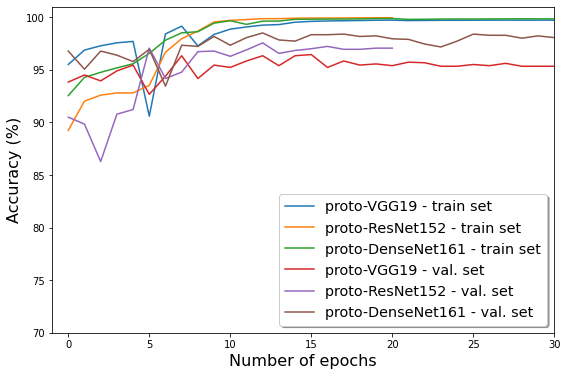

In [4]:
fig, ax = plt.subplots(figsize=(9,6))
# training perf
ax.plot(accu_train_vgg19, label='proto-VGG19 - train set')
ax.plot(accu_train_resnet152, label='proto-ResNet152 - train set')
ax.plot(accu_train_densenet161, label='proto-DenseNet161 - train set')
# validation perfs
ax.plot(accu_val_vgg19, label='proto-VGG19 - val. set')
ax.plot(accu_val_resnet152, label='proto-ResNet152 - val. set')
ax.plot(accu_val_densenet161, label='proto-DenseNet161 - val. set')
# plt.xlim(0, 35)
# plt.ylim(90,100)
plt.xlim(-1, 30)
plt.ylim(70,101)
# plt.title("Performance on the train and validation sets during training")
plt.xlabel("Number of epochs", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)
legend = ax.legend(loc='lower right', shadow=True, fontsize='x-large')
plt.show()

In [5]:
path = "training_logs/CNN_models/"
L2_vgg19 = get_good_lines(path + "vgg19_train.log")
accu2_train_vgg19, accu2_val_vgg19 = get_accuracies(L2_vgg19)

L2_densenet161 = get_good_lines(path + "densenet161_train.log")
accu2_train_densenet161, accu2_val_densenet161 = get_accuracies(L2_densenet161)

L2_resnet152 = get_good_lines(path + "resnet152_train.log")
accu2_train_resnet152, accu2_val_resnet152 = get_accuracies(L2_resnet152)

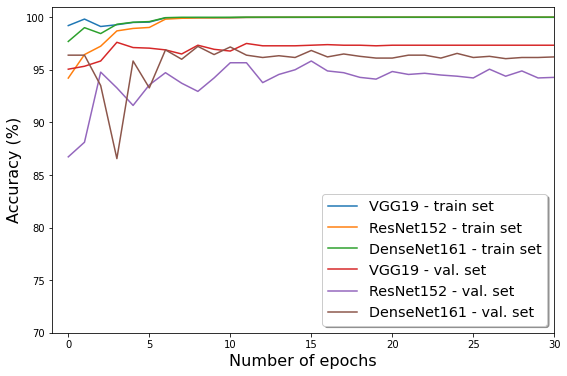

In [6]:
fig, ax = plt.subplots(figsize=(9,6))
# training perf
ax.plot(accu2_train_vgg19, label='VGG19 - train set')
ax.plot(accu2_train_resnet152, label='ResNet152 - train set')
ax.plot(accu2_train_densenet161, label='DenseNet161 - train set')
# validation perfs
ax.plot(accu2_val_vgg19, label='VGG19 - val. set')
ax.plot(accu2_val_resnet152, label='ResNet152 - val. set')
ax.plot(accu2_val_densenet161, label='DenseNet161 - val. set')
plt.xlim(-1, 30)
plt.ylim(70,101)
# plt.title("Performance on the train and validation sets during training")
plt.xlabel("Number of epochs", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)
legend = ax.legend(loc='lower right', shadow=True, fontsize='x-large')
plt.show()

In [7]:
len(accu2_val_vgg19)

50

In [8]:
df_accu2 = pd.DataFrame({"accu_train": accu2_train_vgg19 + accu2_train_resnet152 + accu2_train_densenet161,
                        "accu_val": accu2_val_vgg19 + accu2_val_resnet152 + accu2_val_densenet161,
                        "model": ["vgg19"]*len(accu2_train_vgg19) + ["resnet152"]*len(accu2_train_resnet152) + ["densenet161"]*len(accu2_train_densenet161)})

<!-- !pyppeteer-install -->

In [9]:
# load data
densenet161_10_df_all = pd.read_csv("results/protopnet/densenet161_10_df_all.csv", index_col=0)
densenet161_20_df_all = pd.read_csv("results/protopnet/densenet161_20_df_all.csv", index_col=0)
densenet161_30_df_all = pd.read_csv("results/protopnet/densenet161_30_df_all.csv", index_col=0)
resnet152_10_df_all = pd.read_csv("results/protopnet/resnet152_10_df_all.csv", index_col=0)
resnet152_20_df_all = pd.read_csv("results/protopnet/resnet152_20_df_all.csv", index_col=0)
vgg19_10_df_all = pd.read_csv("results/protopnet/vgg19_10_df_all.csv", index_col=0)
vgg19_20_df_all = pd.read_csv("results/protopnet/vgg19_20_df_all.csv", index_col=0)
vgg19_30_df_all = pd.read_csv("results/protopnet/vgg19_30_df_all.csv", index_col=0)

MRIQC_CLF_T1w_df_all = pd.read_csv("results/mriqc/MRIQC_CLF_T1w_df_all.csv", index_col=0)
MRIQC_CLF_T1w_df_all["prob_y"] = MRIQC_CLF_T1w_df_all["prob_y"]*100

In [10]:
def get_id_number(subid, mriqc_results=False):
    if mriqc_results:
        return int(subid.split("_")[0])
    return int(subid.split("-")[-1])

densenet161_10_df_all["subid"] = densenet161_10_df_all["subid"].apply(get_id_number)
densenet161_20_df_all["subid"] = densenet161_20_df_all["subid"].apply(get_id_number)
densenet161_30_df_all["subid"] = densenet161_30_df_all["subid"].apply(get_id_number)
resnet152_10_df_all["subid"] = resnet152_10_df_all["subid"].apply(get_id_number)
resnet152_20_df_all["subid"] = resnet152_20_df_all["subid"].apply(get_id_number)
vgg19_10_df_all["subid"] = vgg19_10_df_all["subid"].apply(get_id_number)
vgg19_20_df_all["subid"] = vgg19_20_df_all["subid"].apply(get_id_number)
vgg19_30_df_all["subid"] = vgg19_30_df_all["subid"].apply(get_id_number)

MRIQC_CLF_T1w_df_all2 = MRIQC_CLF_T1w_df_all.copy()
MRIQC_CLF_T1w_df_all2["subject_id"] = MRIQC_CLF_T1w_df_all2["subject_id"].apply(get_id_number, mriqc_results=True)

In [11]:
L = []
for el in list(set(MRIQC_CLF_T1w_df_all2.subject_id)):
    n = MRIQC_CLF_T1w_df_all2.subject_id.tolist().count(el)
    if n > 1:
        L.append(el)
        
len(L)

129

In [12]:
MRIQC_CLF_T1w_df_all.iloc[MRIQC_CLF_T1w_df_all2[[el in L for el in MRIQC_CLF_T1w_df_all2.subject_id]].index]

,pred_y,prob_y,subject_id
788,0.0,37.763788,28675_ses-1_run-1
789,0.0,24.758867,28675_ses-1_run-2
790,0.0,27.535601,28675_ses-1_run-3
791,0.0,23.589302,28675_ses-1_run-4
792,0.0,26.683007,28675_ses-1_run-5
...,...,...,...
2120,0.0,30.492417,51300
2127,0.0,44.227925,51307
2131,1.0,78.591542,51312
2132,0.0,38.125513,51313


In [13]:
L_common = []
for el in L:
    if el in list(vgg19_30_df_all.subid):
        L_common.append(el)

In [14]:
for el in L_common:
    print(MRIQC_CLF_T1w_df_all[MRIQC_CLF_T1w_df_all2.subject_id == el])

      pred_y     prob_y         subject_id
1304     0.0  36.134410  50005_ses-1_run-1
1305     0.0  28.830834  50005_ses-2_run-1
1833     0.0  26.774610              50005
      pred_y     prob_y         subject_id
1306     0.0  22.336430  50006_ses-1_run-1
1307     0.0  23.248460  50006_ses-2_run-1
1834     0.0  21.481167              50006
      pred_y     prob_y         subject_id
1308     1.0  54.872906  50007_ses-1_run-1
1309     0.0  42.109097  50007_ses-2_run-1
1835     1.0  50.362463              50007
      pred_y     prob_y         subject_id
1310     0.0  31.128382  50013_ses-1_run-1
1311     0.0  28.975377  50013_ses-2_run-1
1841     0.0  29.082843              50013
      pred_y     prob_y         subject_id
1312     1.0  57.807378  50026_ses-1_run-1
1313     1.0  59.627319  50026_ses-2_run-1
1852     0.0  48.752968              50026
      pred_y     prob_y         subject_id
1314     0.0  23.616776  50027_ses-1_run-1
1315     0.0  22.211901  50027_ses-2_run-1
1853     0.

For doublon cases, we keep subject_id corresponding to an integer only.

In [15]:
len(set(vgg19_30_df_all.subid)) == vgg19_30_df_all.shape[0]

True

In [16]:
MRIQC_CLF_T1w_df_all3 = MRIQC_CLF_T1w_df_all2.copy()
for el in L_common:
    subdf = MRIQC_CLF_T1w_df_all[MRIQC_CLF_T1w_df_all2.subject_id == el]
    for s in subdf.subject_id:
        if "_" in s:
            MRIQC_CLF_T1w_df_all3.drop(subdf[subdf.subject_id == s].index[0], axis=0, inplace=True)

In [17]:
# changing column names and adding column "model" in view of concatenating the dataframes
MRIQC_CLF_T1w_df_all3.columns = ["pred", "proba", "subid"]
MRIQC_CLF_T1w_df_all3["model"] = ["MRIQC_CLF"]*MRIQC_CLF_T1w_df_all3.shape[0]
MRIQC_CLF_T1w_df_all3

,pred,proba,subid,model
0,0.0,35.063675,29006,MRIQC_CLF
1,0.0,37.661363,29007,MRIQC_CLF
2,1.0,64.121984,29008,MRIQC_CLF
3,0.0,30.788444,29009,MRIQC_CLF
4,0.0,31.498315,29010,MRIQC_CLF
...,...,...,...,...
2399,0.0,35.895191,50624,MRIQC_CLF
2400,0.0,39.033549,50625,MRIQC_CLF
2401,0.0,45.973526,50626,MRIQC_CLF
2402,0.0,27.841877,50627,MRIQC_CLF


In [18]:
# adding column "model" in view of concatenating the dataframes
len_data = densenet161_10_df_all.shape[0]
densenet161_10_df_all["model"] = ["densenet161_10"]*len_data
densenet161_20_df_all["model"] = ["densenet161_20"]*len_data
densenet161_30_df_all["model"] = ["densenet161_30"]*len_data
resnet152_10_df_all["model"] = ["resnet152_10"]*len_data
resnet152_20_df_all["model"] = ["resnet152_20"]*len_data
vgg19_10_df_all["model"] = ["vgg19_10"]*len_data
vgg19_20_df_all["model"] = ["vgg19_20"]*len_data
vgg19_30_df_all["model"] = ["vgg19_30"]*len_data


In [19]:
# keeping only common subids
common_subids = list(set(densenet161_10_df_all.subid) & set(MRIQC_CLF_T1w_df_all3.subid))

densenet161_10_df_all = densenet161_10_df_all[[subid in common_subids for subid in densenet161_10_df_all.subid]] 
densenet161_20_df_all = densenet161_20_df_all[[subid in common_subids for subid in densenet161_20_df_all.subid]] 
densenet161_30_df_all = densenet161_30_df_all[[subid in common_subids for subid in densenet161_30_df_all.subid]] 

resnet152_10_df_all = resnet152_10_df_all[[subid in common_subids for subid in resnet152_10_df_all.subid]] 
resnet152_20_df_all = resnet152_20_df_all[[subid in common_subids for subid in resnet152_20_df_all.subid]] 

vgg19_10_df_all = vgg19_10_df_all[[subid in common_subids for subid in vgg19_10_df_all.subid]] 
vgg19_20_df_all = vgg19_20_df_all[[subid in common_subids for subid in vgg19_20_df_all.subid]] 
vgg19_30_df_all = vgg19_30_df_all[[subid in common_subids for subid in vgg19_30_df_all.subid]] 

MRIQC_CLF_T1w_df_all3 = MRIQC_CLF_T1w_df_all3[[subid in common_subids for subid in MRIQC_CLF_T1w_df_all3.subid]] 


# sorting by subid and resetting index
densenet161_10_df_all.sort_values("subid", inplace=True)
densenet161_10_df_all.reset_index(drop=True, inplace=True)
densenet161_20_df_all.sort_values("subid", inplace=True)
densenet161_20_df_all.reset_index(drop=True, inplace=True)
densenet161_30_df_all.sort_values("subid", inplace=True)
densenet161_30_df_all.reset_index(drop=True, inplace=True)

resnet152_10_df_all.sort_values("subid", inplace=True)
resnet152_10_df_all.reset_index(drop=True, inplace=True)
resnet152_20_df_all.sort_values("subid", inplace=True)
resnet152_20_df_all.reset_index(drop=True, inplace=True)

vgg19_10_df_all.sort_values("subid", inplace=True)
vgg19_10_df_all.reset_index(drop=True, inplace=True)
vgg19_20_df_all.sort_values("subid", inplace=True)
vgg19_20_df_all.reset_index(drop=True, inplace=True)
vgg19_30_df_all.sort_values("subid", inplace=True)
vgg19_30_df_all.reset_index(drop=True, inplace=True)

MRIQC_CLF_T1w_df_all3.sort_values("subid", inplace=True)
MRIQC_CLF_T1w_df_all3.reset_index(drop=True, inplace=True)


/home/mleanie/p3_pytorch/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [20]:
# MRIQC_CLF_T1w_df_all3.to_csv("./MRIQC_CLF_T1w_df_all3.csv", index=None)

In [21]:
densenet161_10_df_all.shape

(1779, 5)

In [22]:
# Merge data to ease plots with seaborn
columns_to_merge = ["pred", "proba", "subid", "model"]
data = pd.concat([MRIQC_CLF_T1w_df_all3, 
                 densenet161_10_df_all[columns_to_merge],
                 densenet161_20_df_all[columns_to_merge],
                 densenet161_30_df_all[columns_to_merge],
                 resnet152_10_df_all[columns_to_merge],
                 resnet152_20_df_all[columns_to_merge],
                 vgg19_10_df_all[columns_to_merge],
                 vgg19_20_df_all[columns_to_merge],
                 vgg19_30_df_all[columns_to_merge]])
data["pred"] = data["pred"].astype(int).astype(str)

In [23]:
# Creating a column that refers each subid to be in the train, validation or test set
subids_train = pd.read_csv("subids_train.csv", header=None)[0].tolist()
subids_train = list(map(lambda x: int(x.split("-")[-1]), subids_train))
subids_val = pd.read_csv("subids_val.csv", header=None)[0].tolist()
subids_val = list(map(lambda x: int(x.split("-")[-1]), subids_val))
subids_test1 = pd.read_csv("subids_testset1.csv", header=None)[0].tolist()
subids_test1 = list(map(lambda x: int(x.split("-")[-1]), subids_test1))
subids_test3_gm = pd.read_csv("subids_testset3_good_medium.csv", header=None)[0].tolist()
subids_test3_gm = list(map(lambda x: int(x.split("-")[-1]), subids_test3_gm))
subids_test3_g1 = pd.read_csv("subids_testset3_good_part1.csv", header=None)[0].tolist()
subids_test3_g1 = list(map(lambda x: int(x.split("-")[-1]), subids_test3_g1))
subids_test3_g2 = pd.read_csv("subids_testset3_good_part2.csv", header=None)[0].tolist()
subids_test3_g2 = list(map(lambda x: int(x.split("-")[-1]), subids_test3_g2))
subids_abide2 = pd.read_csv("subids_abide2.csv", header=None)[0].tolist()
subids_abide2 = list(map(lambda x: int(x), subids_abide2))

def find_dataset(x):
    if x in subids_train: return "ABIDE 1 train set"
    elif x in subids_val: return "ABIDE 1 validation set"
    elif x in subids_test1: return "ABIDE 1 test set 1"
    elif x in subids_test3_gm: return "ABIDE 1 test set 2 good-medium"
    elif x in subids_test3_g1: return "ABIDE 1 test set 2 good"
    elif x in subids_test3_g2: return "ABIDE 1 test set 2 good"
    elif x in subids_abide2: return "ABIDE 2 set"
    else: return "no dataset"
    
data["dataset"] = data["subid"].apply(find_dataset)

In [24]:
data.dataset.value_counts()

ABIDE 2 set                       7191
ABIDE 1 test set 2 good           3627
ABIDE 1 test set 2 good-medium    2295
ABIDE 1 test set 1                2250
ABIDE 1 train set                  540
ABIDE 1 validation set             108
Name: dataset, dtype: int64

In [25]:
data.head()

,pred,proba,subid,model,dataset
0,0,27.980647,28741,MRIQC_CLF,ABIDE 2 set
1,0,23.471746,28742,MRIQC_CLF,ABIDE 2 set
2,0,21.940849,28743,MRIQC_CLF,ABIDE 2 set
3,0,33.708196,28744,MRIQC_CLF,ABIDE 2 set
4,0,46.782542,28745,MRIQC_CLF,ABIDE 2 set


Text(0.5, 1.0, 'Comparing the distribution of probabilities between the models (1779 scans)')

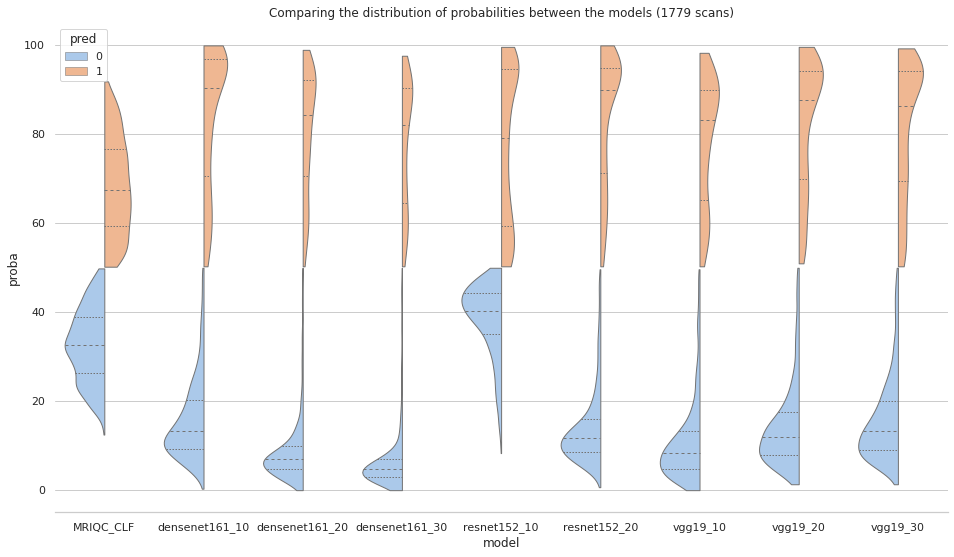

In [26]:
# violinplots comparison of probas between models
# show P(0 or 1) on top of each violin
plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid", palette="pastel")
sns.violinplot(data=data, x="model", y="proba", hue="pred",
               split=True, inner="quart", linewidth=1, cut=0)
sns.despine(left=True)
plt.title("Comparing the distribution of probabilities between the models (1779 scans)")

Text(0.5, 1.0, 'Comparing the distribution of probabilities between the datasets (1779 scans)')

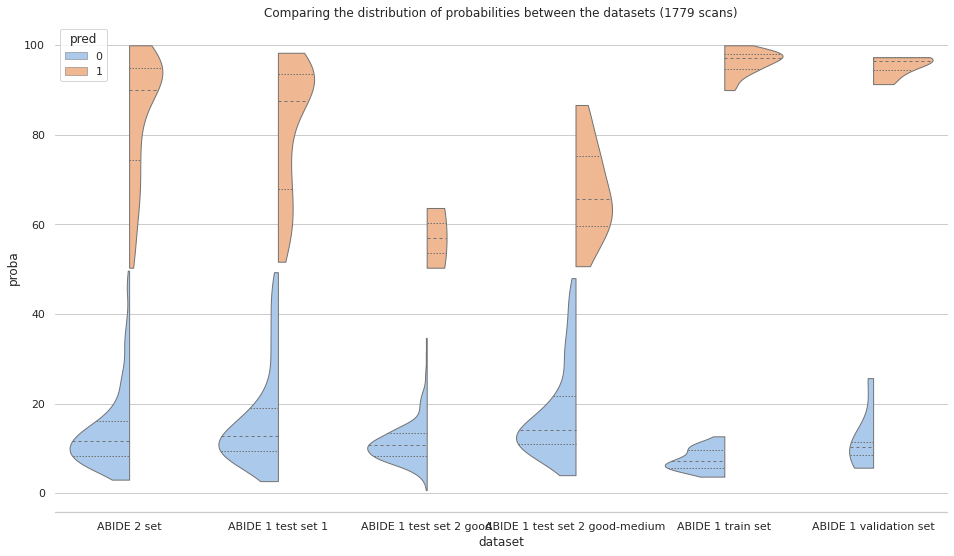

In [27]:
# violinplots comparison of probas between datasets
# show P(0 or 1) on top of each violin
plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid", palette="pastel")
sns.violinplot(data=data[data.model == "resnet152_20"], x="dataset", y="proba", hue="pred",
               split=True, inner="quart", linewidth=1, cut=0)
sns.despine(left=True)
plt.title("Comparing the distribution of probabilities between the datasets (1779 scans)")

From the violinplots, we can see that the distribution of predictions "undamaged" looks gaussian for our models. Differently, the distribution of the predictions "damaged" looks like a gaussian mixture. It is expected since there are globally damaged scans and locally damaged scans, then the percentage of slices predicted damaged will be different for the two types. In addition, there are different intensity levels for the artifacts as described by the paper from L.Backhausen et al that might yield to different levels of probability.
Besides, we observe that the distribution of the predictions from the MRIQC classifier is different from other models. At first sight it does not look Gaussian. Furthermore, the distribution of the predictions "undamaged" looks like a mixture. 
We need to mention that to get the predictions from the MRIQC classifier we did not set a particular threshold on probability values, we kept the parameters by default.
Moreover, the ABIDE dataset was fully integrated in training the MRIQC algorithm. Thus, the results on the ABIDE dataset should be very good for the MRIQC classifier.  

In [28]:
data.dataset.value_counts()

ABIDE 2 set                       7191
ABIDE 1 test set 2 good           3627
ABIDE 1 test set 2 good-medium    2295
ABIDE 1 test set 1                2250
ABIDE 1 train set                  540
ABIDE 1 validation set             108
Name: dataset, dtype: int64

In [29]:
data.model.value_counts()

MRIQC_CLF         1779
densenet161_10    1779
densenet161_20    1779
densenet161_30    1779
resnet152_10      1779
resnet152_20      1779
vgg19_10          1779
vgg19_20          1779
vgg19_30          1779
Name: model, dtype: int64

Text(0.5, 1.0, 'Comparing the distribution of probabilities between the models on the test set (908 scans)')

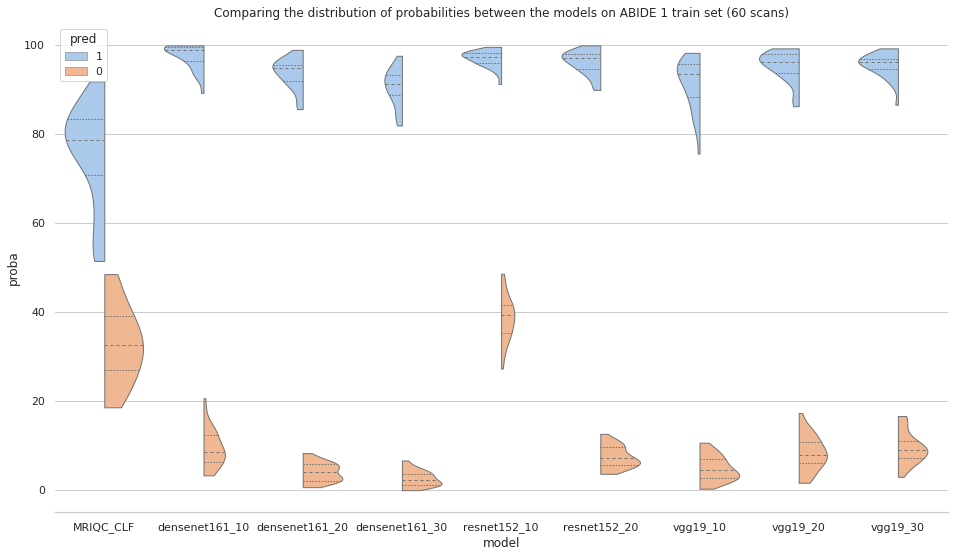

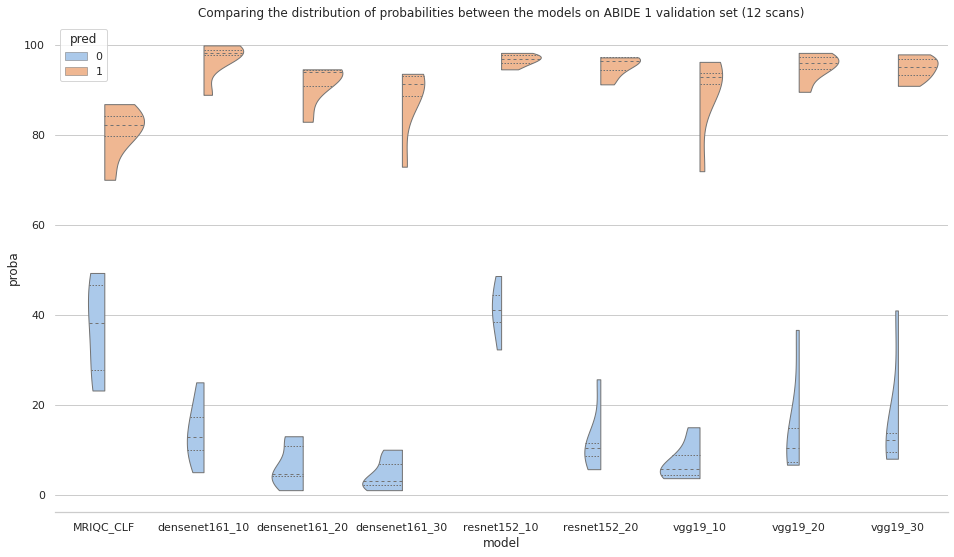

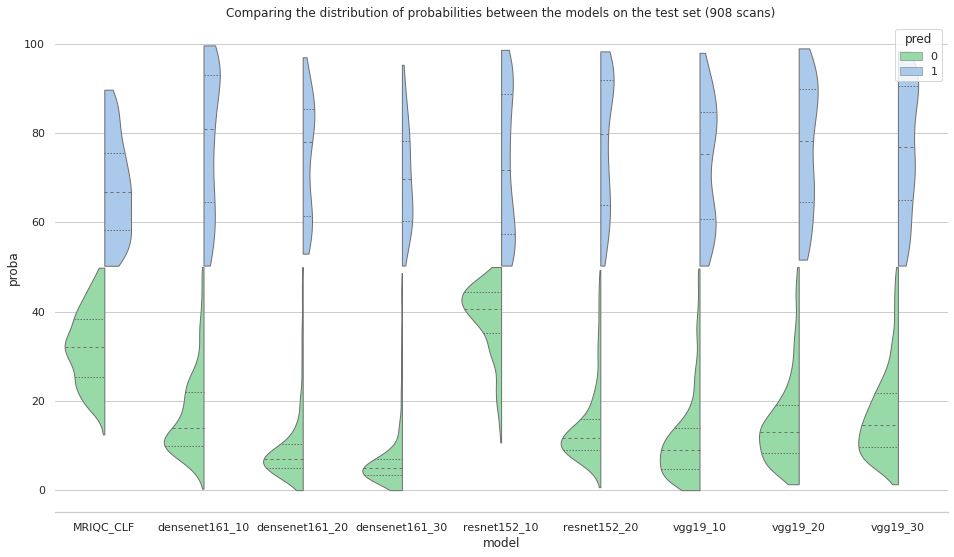

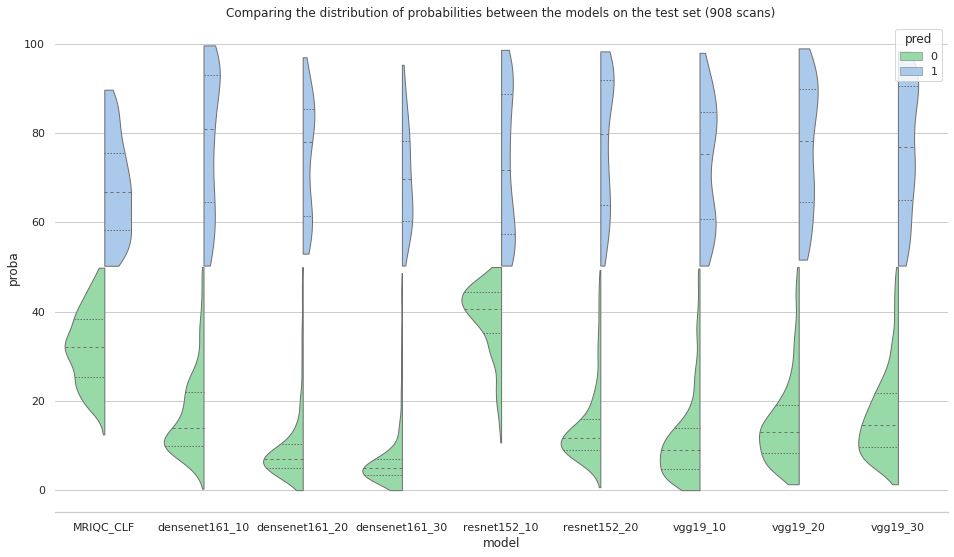

In [30]:
# violinplots comparison of probas between models / dataset
# show P(0 or 1) on top of each violin
dataset = "ABIDE 1 train set"
sub_data = data[data.dataset == dataset]
plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid", palette="pastel")
sns.violinplot(data=sub_data, x="model", y="proba", hue="pred",
               split=True, inner="quart", linewidth=1, cut=0)
sns.despine(left=True)
plt.title("Comparing the distribution of probabilities between the models on %s (%s scans)"%(dataset, int(sub_data.shape[0] / 9)))

dataset = "ABIDE 1 validation set"
sub_data = data[data.dataset == dataset]
plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid", palette="pastel")
sns.violinplot(data=sub_data, x="model", y="proba", hue="pred",
               split=True, inner="quart", linewidth=1, cut=0)
sns.despine(left=True)
plt.title("Comparing the distribution of probabilities between the models on %s (%s scans)"%(dataset, int(sub_data.shape[0] / 9)))


# TEST 908 scans
dataset1 = "ABIDE 1 test set 1"
dataset2 = "ABIDE 1 test set 2 good-medium"
dataset3 = "ABIDE 1 test set 2 good"
sub_data = data[data.dataset == dataset1]
sub_data = pd.concat([sub_data, data[data.dataset == dataset2]], axis=0)
sub_data = pd.concat([sub_data, data[data.dataset == dataset3]], axis=0)
plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid", palette="pastel")
sns.violinplot(data=sub_data, x="model", y="proba", hue="pred",
               split=True, inner="quart", linewidth=1, cut=0,  palette=["g", "b"])
sns.despine(left=True)
plt.title("Comparing the distribution of probabilities between the models on the test set (%s scans)"%(int(sub_data.shape[0] / 9)))


# TEST 908 scans
dataset1 = "ABIDE 1 test set 1"
dataset2 = "ABIDE 1 test set 2 good-medium"
dataset3 = "ABIDE 1 test set 2 good"
sub_data = data[data.dataset == dataset1]
sub_data = pd.concat([sub_data, data[data.dataset == dataset2]], axis=0)
sub_data = pd.concat([sub_data, data[data.dataset == dataset3]], axis=0)
plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid", palette="pastel")
sns.violinplot(data=sub_data, x="model", y="proba", hue="pred",
               split=True, inner="quart", linewidth=1, cut=0,  palette=["g", "b"])
sns.despine(left=True)
plt.title("Comparing the distribution of probabilities between the models on the test set (%s scans)"%(int(sub_data.shape[0] / 9)))

In [31]:
data

,pred,proba,subid,model,dataset
0,0,27.980647,28741,MRIQC_CLF,ABIDE 2 set
1,0,23.471746,28742,MRIQC_CLF,ABIDE 2 set
2,0,21.940849,28743,MRIQC_CLF,ABIDE 2 set
3,0,33.708196,28744,MRIQC_CLF,ABIDE 2 set
4,0,46.782542,28745,MRIQC_CLF,ABIDE 2 set
...,...,...,...,...,...
1774,0,16.330000,51583,vgg19_30,ABIDE 1 test set 2 good
1775,0,15.000000,51584,vgg19_30,ABIDE 1 test set 2 good
1776,0,18.330000,51585,vgg19_30,ABIDE 1 test set 2 good
1777,0,19.670000,51606,vgg19_30,ABIDE 1 test set 2 good


In [32]:
# dataset = "ABIDE 1 test set 2 good-medium"
# sub_data = data[data.dataset == dataset]
# plt.figure(figsize=(16, 9))
# sns.set_theme(style="whitegrid", palette="pastel")
# sns.violinplot(data=sub_data, x="model", y="proba", hue="pred",
#                split=True, inner="quart", linewidth=1, cut=0)
# sns.despine(left=True)
# plt.title("Comparing the distribution of probabilities between the models on %s (%s scans)"%(dataset, int(sub_data.shape[0] / 9)))


# dataset = "ABIDE 1 test set 2 good"
# sub_data = data[data.dataset == dataset]
# plt.figure(figsize=(16, 9))
# sns.set_theme(style="whitegrid", palette="pastel")
# sns.violinplot(data=sub_data, x="model", y="proba", hue="pred",
#                split=True, inner="quart", linewidth=1, cut=0)
# sns.despine(left=True)
# plt.title("Comparing the distribution of probabilities between the models on %s (%s scans)"%(dataset, int(sub_data.shape[0] / 9)))


# Graphs of global probabilities % different types of artefacts, scans globally/locally damaged, ...

In [33]:
# Comparison of probabilities on scans annotated 1,1,1,1
df_manual_annotations_good = pd.read_csv("annotations/db_qc_1111.csv")
df_manual_annotations_good["subid"] = [int(s.split("-")[-1]) for s in df_manual_annotations_good["0"]]
df_manual_annotations_good.drop("0", axis=1, inplace=True)
print("Number of common subids:", len(set(data.subid) & set(df_manual_annotations_good.subid)))
df_manual_annotations_good = pd.merge(data, df_manual_annotations_good, on=["subid"])
df_manual_annotations_good["damaged/undamaged"] = ["undamaged"]*df_manual_annotations_good.shape[0]

Number of common subids: 564


In [34]:
df_manual_annotations_good.head()

,pred,proba,subid,model,dataset,Image sharpness,Ringing,CNR subcortical structures,CNR GM and WM,damaged/undamaged
0,0,19.583847,50004,MRIQC_CLF,ABIDE 1 test set 1,1,1,1,1,undamaged
1,0,22.000000,50004,densenet161_10,ABIDE 1 test set 1,1,1,1,1,undamaged
2,0,6.670000,50004,densenet161_20,ABIDE 1 test set 1,1,1,1,1,undamaged
3,0,6.670000,50004,densenet161_30,ABIDE 1 test set 1,1,1,1,1,undamaged
4,0,42.330000,50004,resnet152_10,ABIDE 1 test set 1,1,1,1,1,undamaged


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Comparing the probabilities between good scans (in total: 564 good quality scans)')

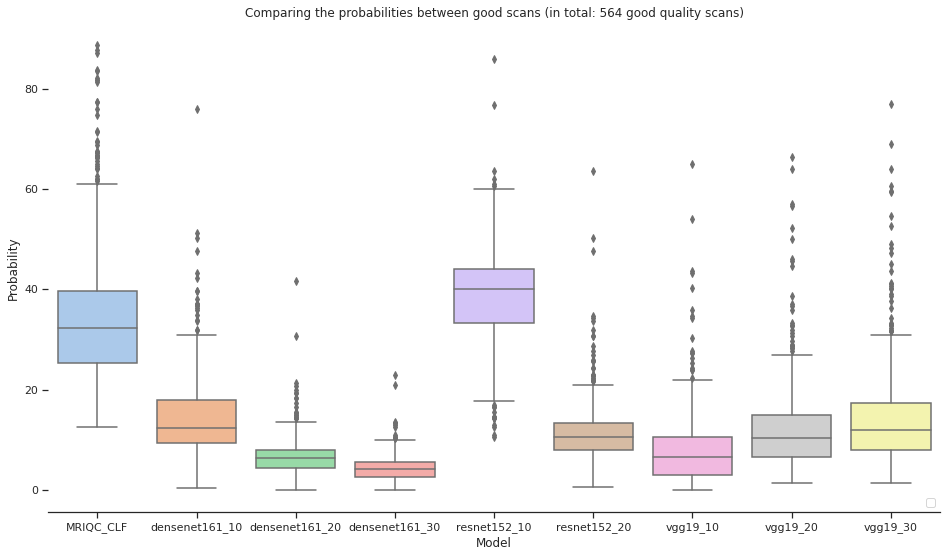

In [35]:
plt.figure(figsize=(16, 9))
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=df_manual_annotations_good, x="model", y="proba")
sns.despine(left=True)
plt.ylabel("Probability")
plt.xlabel("Model")
plt.legend(loc='lower right')
plt.title("Comparing the probabilities between good scans (in total: 564 good quality scans)")

In [36]:
# Comparison of predictions with what we annotated manually: locally damaged? type of artifact?
df_manual_annotations = pd.read_csv("annotations/db_qc_not_1111.csv")
df_manual_annotations["subid"] = [int(s.split("-")[-1]) for s in df_manual_annotations["0"]]
df_manual_annotations.drop("0", axis=1, inplace=True)
df_manual_annotations = df_manual_annotations[[subid in common_subids for subid in df_manual_annotations.subid]]
print("Number of common subids:", len(set(data.subid) & set(df_manual_annotations.subid)))
df_manual_annotations = pd.merge(data, df_manual_annotations, on=["subid"])
df_manual_annotations["damaged/undamaged"] = ["damaged"]*df_manual_annotations.shape[0]

Number of common subids: 416


In [37]:
df_manual_annotations.head()

,pred,proba,subid,model,dataset,Image sharpness,Ringing,CNR subcortical structures,CNR GM and WM,damaged/undamaged
0,0,39.102265,50003,MRIQC_CLF,ABIDE 1 test set 1,2,2,2,2,damaged
1,0,43.330000,50003,densenet161_10,ABIDE 1 test set 1,2,2,2,2,damaged
2,0,22.000000,50003,densenet161_20,ABIDE 1 test set 1,2,2,2,2,damaged
3,0,16.000000,50003,densenet161_30,ABIDE 1 test set 1,2,2,2,2,damaged
4,1,68.670000,50003,resnet152_10,ABIDE 1 test set 1,2,2,2,2,damaged


Text(0.5, 1.0, 'Comparing the probabilities between damaged and undamaged scans (in total: 980 scans from ABIDE 1)')

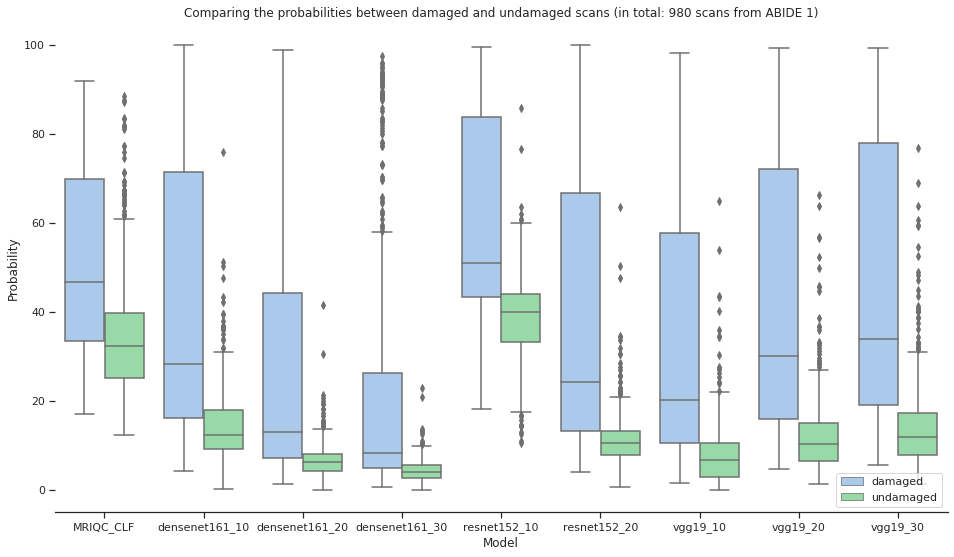

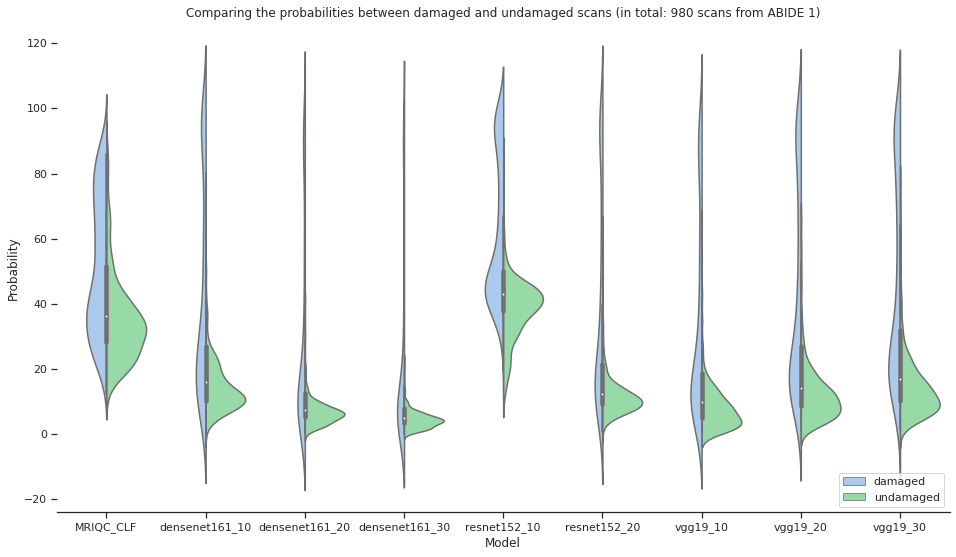

In [38]:
df_manual_annotations_bad_good = pd.concat([df_manual_annotations, df_manual_annotations_good])

# plt.figure(figsize=(16, 9))
# sns.set_theme(style="ticks", palette="pastel")
# sns.violinplot(data=df_manual_annotations_bad_good, x="model", y="proba", 
#             hue="damaged/undamaged", split=True, inner="quart", linewidth=1, cut=0)
# sns.despine(left=True)
# plt.ylabel("Probability")
# plt.xlabel("Model")
# plt.legend(loc='lower right')
# plt.title("Comparing the probailities between damaged and undamaged scans (in total: 980 scans with artifacts)")

plt.figure(figsize=(16, 9))
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=df_manual_annotations_bad_good, x="model", y="proba", 
            hue="damaged/undamaged", palette=["b", "g"])
sns.despine(left=True)
plt.ylabel("Probability")
plt.xlabel("Model")
plt.legend(loc='lower right')
plt.title("Comparing the probabilities between damaged and undamaged scans (in total: 980 scans from ABIDE 1)")


plt.figure(figsize=(16, 9))
sns.set_theme(style="ticks", palette="pastel")
sns.violinplot(data=df_manual_annotations_bad_good, 
               x="model", y="proba", hue="damaged/undamaged", 
               split=True, palette=["b", "g"])
sns.despine(left=True)
plt.ylabel("Probability")
plt.xlabel("Model")
plt.legend(loc='lower right')
plt.title("Comparing the probabilities between damaged and undamaged scans (in total: 980 scans from ABIDE 1)")

# datasets_to_keep = ['ABIDE 1 test set 1', 'ABIDE 1 test set 2 good-medium', 'ABIDE 1 test set 2 good']
# plt.figure(figsize=(16, 9))
# sns.set_theme(style="ticks", palette="pastel")
# sns.violinplot(data=df_manual_annotations_bad_good[[x in datasets_to_keep for x in df_manual_annotations_bad_good.dataset]], 
#                x="model", y="proba", hue="damaged/undamaged", 
#                split=True, palette=["b", "g"])
# sns.despine(left=True)
# plt.ylabel("Probability")
# plt.xlabel("Model")
# plt.legend(loc='lower right')
# plt.title("Comparing the probabilities between damaged and undamaged scans (in total: 980 scans from ABIDE 1)")

In [39]:
df_manual_annotations_bad_good.dataset.unique()

array(['ABIDE 1 test set 1', 'ABIDE 1 test set 2 good-medium',
       'ABIDE 1 train set', 'ABIDE 1 validation set',
       'ABIDE 1 test set 2 good'], dtype=object)

We observe there are overlaps between the probabilities of damaged scans and those of undamaged scans. The overlap looks bigger for MRIQC algorithm than for our models. We should perform a statistical test of type Mann-Whitney U test (since homoscedasticity does not look verified) to compare the distributions between the probabilities of damaged/undamaged scans for every model. 

In [40]:
df_manual_annotations.head()

,pred,proba,subid,model,dataset,Image sharpness,Ringing,CNR subcortical structures,CNR GM and WM,damaged/undamaged
0,0,39.102265,50003,MRIQC_CLF,ABIDE 1 test set 1,2,2,2,2,damaged
1,0,43.330000,50003,densenet161_10,ABIDE 1 test set 1,2,2,2,2,damaged
2,0,22.000000,50003,densenet161_20,ABIDE 1 test set 1,2,2,2,2,damaged
3,0,16.000000,50003,densenet161_30,ABIDE 1 test set 1,2,2,2,2,damaged
4,1,68.670000,50003,resnet152_10,ABIDE 1 test set 1,2,2,2,2,damaged


Text(0.5, 1.0, 'Comparing the probailities between different levels of Image sharpness (in total: 416 scans with artifacts)')

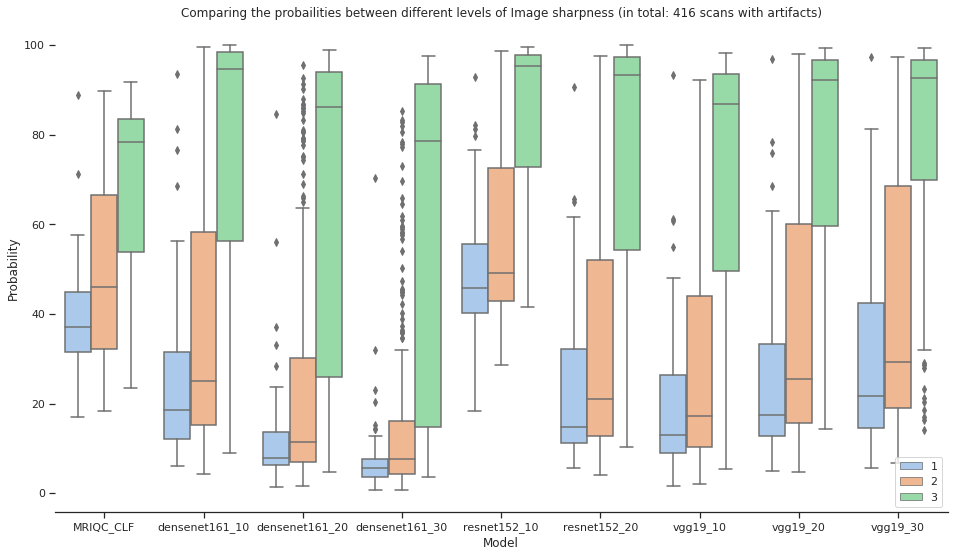

In [41]:
artefacts = ["Image sharpness", "Ringing", 
            "CNR subcortical structures",
            "CNR GM and WM"]

artefact = artefacts[0]
# plt.figure(figsize=(16, 9))
# sns.set_theme(style="ticks", palette="pastel")
# sns.boxplot(data=df_manual_annotations_bad_good, x="model", y="proba", 
#             hue="pred", palette=["g", "b"])
# sns.despine(left=True)
# plt.ylabel("Probability")
# plt.xlabel("Model")
# plt.legend(loc='lower right')
# plt.title("Comparing the predicted probabilities between damaged and undamaged scans (in total: 980 scans with artifacts)")
plt.figure(figsize=(16, 9))
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=df_manual_annotations, x="model", y="proba", 
            hue=artefact)
sns.despine(left=True)
plt.ylabel("Probability")
plt.xlabel("Model")
plt.legend(loc='lower right')
plt.title("Comparing the probailities between different levels of %s (in total: 416 scans with artifacts)"%(artefact))

In [42]:
# Looking at annotations more detailed on several scans 
df_manual_details_artifact = pd.read_csv("annotations/annotations_label1.csv")
df_manual_details_artifact.fillna(0, inplace=True)
df_manual_details_artifact["subid"] = [int(s.split("-")[-1]) for s in df_manual_details_artifact["sub_id"]]
df_manual_details_artifact.drop("sub_id", axis=1, inplace=True)
df_manual_details_artifact = df_manual_details_artifact.astype(int)
print("Number of common subids:", len(set(data.subid) & set(df_manual_details_artifact.subid)))
# Merging
df_manual_details_artifact = pd.merge(data, df_manual_details_artifact, on=["subid"])

Number of common subids: 124


In [43]:
df_manual_details_artifact.head()

,pred,proba,subid,model,dataset,bad ringing/im sharpness but medium cnr,CNR medium,local erasement,local ringing,medium to bad image sharpness,CNR good
0,0,39.102265,50003,MRIQC_CLF,ABIDE 1 test set 1,0,1,0,0,1,0
1,0,43.330000,50003,densenet161_10,ABIDE 1 test set 1,0,1,0,0,1,0
2,0,22.000000,50003,densenet161_20,ABIDE 1 test set 1,0,1,0,0,1,0
3,0,16.000000,50003,densenet161_30,ABIDE 1 test set 1,0,1,0,0,1,0
4,1,68.670000,50003,resnet152_10,ABIDE 1 test set 1,0,1,0,0,1,0


Text(0.5, 1.0, 'Comparing scans with local erasement (1), with others (0) (in total: 124 scans with artifacts)')

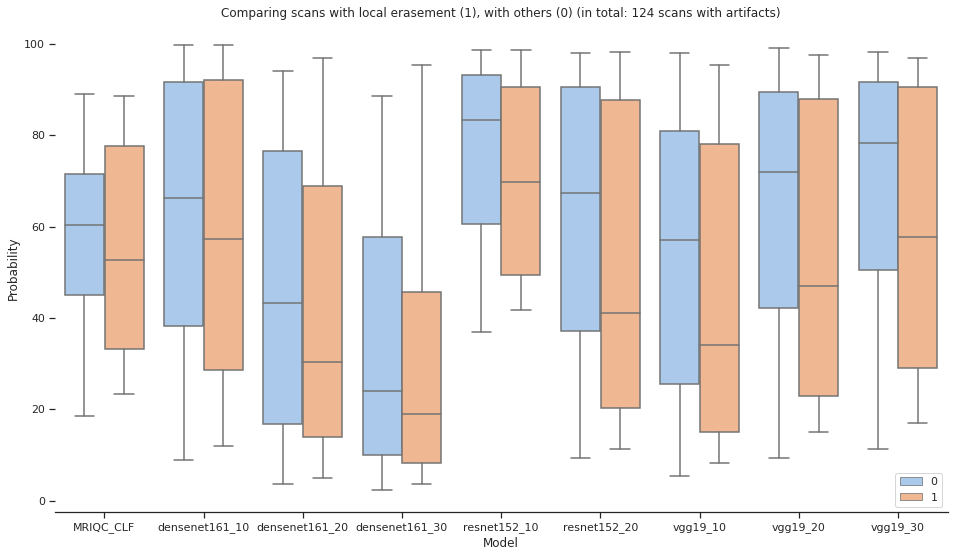

In [44]:
artefacts = ["bad ringing/im sharpness but medium cnr", "CNR medium", 
            "local erasement", "local ringing", "medium to bad image sharpness",
            "CNR good"]

artefact = artefacts[2]

plt.figure(figsize=(16, 9))
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=df_manual_details_artifact, x="model", y="proba", 
            hue=artefact)
sns.despine(left=True)
plt.ylabel("Probability")
plt.xlabel("Model")
plt.legend(loc='lower right')
plt.title("Comparing scans with %s (1), with others (0) (in total: 124 scans with artifacts)"%(artefact))

From the boxplots, we observe that the worse is the Contrast to Noise ratio of GM/WM and of subcortical structures, the higher are the probabilities on all the models (see fist graph). The opposite phenomenon is also shown on the last graph.  
We can deduce that our models are very sensitive to the Contrast to Noise ratio of GM/WM and of subcortical structures. 

TODOS: 
- give global ROC AUC and Accuracy scores for each model on each dataset
- give ROC AUC and Accuracy scores for each class for each model on each dataset
- give graphs of global probabilities % different types of artefacts, scans globally/locally damaged, ...
- give difference of scans pred damaged/undamaged according to the model
- give results on scans locally damaged for resnet152-10ep

# Validation global preds ABIDE 2

Text(0.5, 1.0, 'Comparing the distribution of probabilities between the models on ABIDE 2 set (799 scans)')

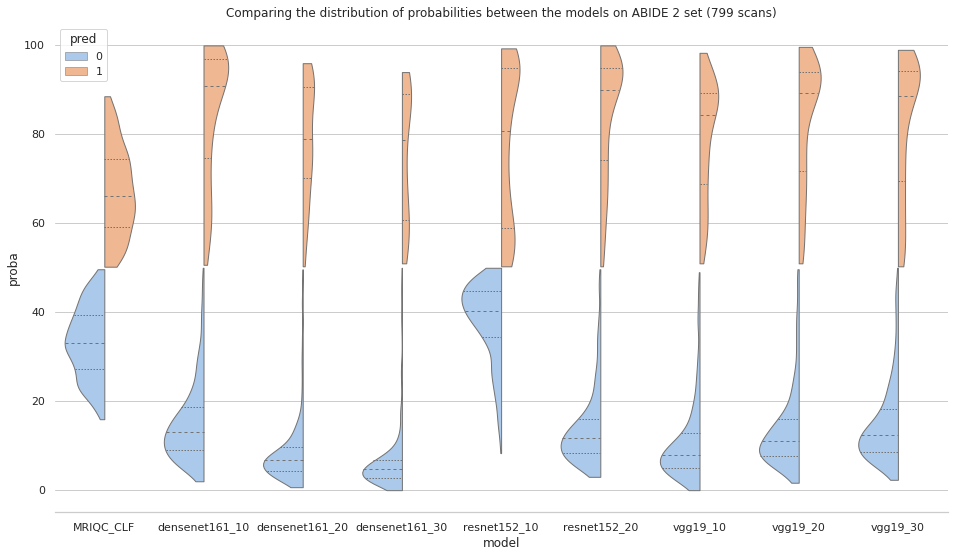

In [45]:
dataset = "ABIDE 2 set"
sub_data = data[data.dataset == dataset]
plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid", palette="pastel")
sns.violinplot(data=sub_data, x="model", y="proba", hue="pred",
               split=True, inner="quart", linewidth=1, cut=0)
sns.despine(left=True)
plt.title("Comparing the distribution of probabilities between the models on %s (%s scans)"%(dataset, int(sub_data.shape[0] / 9)))


In [46]:
df_proto_r152_results = sub_data[sub_data.model == "resnet152_10"].merge(sub_data[sub_data.model == "MRIQC_CLF"], on="subid")
df_proto_r152_results.groupby("pred_y").pred_x.value_counts()

pred_y  pred_x
0       0         491
        1          97
1       1         112
        0          99
Name: pred_x, dtype: int64

In [47]:
print("Acc:", accuracy_score(y_pred=df_proto_r152_results.pred_x.astype(int), y_true=df_proto_r152_results.pred_y.astype(int)))
print("AUC:", roc_auc_score(y_score=df_proto_r152_results.proba_x, y_true=df_proto_r152_results.pred_y.astype(int)))


Acc: 0.7546933667083855
AUC: 0.7180457491053294


In [48]:
# results CNN baselines
df_cnn_densenet161 = pd.read_csv("./results/CNN_baselines/abide2_tot_df_densenet161.csv", index_col=0)
df_cnn_resnet152 = pd.read_csv("./results/CNN_baselines/abide2_tot_df_resnet152.csv", index_col=0)
df_cnn_vgg19 = pd.read_csv("./results/CNN_baselines/abide2_tot_df_vgg19.csv", index_col=0)

In [49]:
df_cnn_results = df_cnn_vgg19.merge(sub_data[sub_data.model == "MRIQC_CLF"], on="subid")

In [50]:
from sklearn.metrics import roc_auc_score, accuracy_score

print("Acc:", accuracy_score(y_pred=df_cnn_results.pred_x, y_true=df_cnn_results.pred_y.astype(int)))
print("AUC:", roc_auc_score(y_score=df_cnn_results.proba_x, y_true=df_cnn_results.pred_y.astype(int)))


Acc: 0.7947434292866082
AUC: 0.6787326304929554


In [51]:
df_cnn_results.groupby("pred_y").pred_x.value_counts()

pred_y  pred_x
0       0         557
        1          31
1       0         133
        1          78
Name: pred_x, dtype: int64

In [52]:
# sub_data[sub_data.model == "MRIQC_CLF"]

In [53]:
# plt.figure(figsize=(16, 9))
# sns.set_theme(style="ticks", palette="pastel")
# sns.boxplot(data=data, x="model", y="proba", hue="pred")
# sns.despine(left=True)

# Processing Time 

Text(0.5, 1.0, 'Distribution of prediction time duration by DL model')

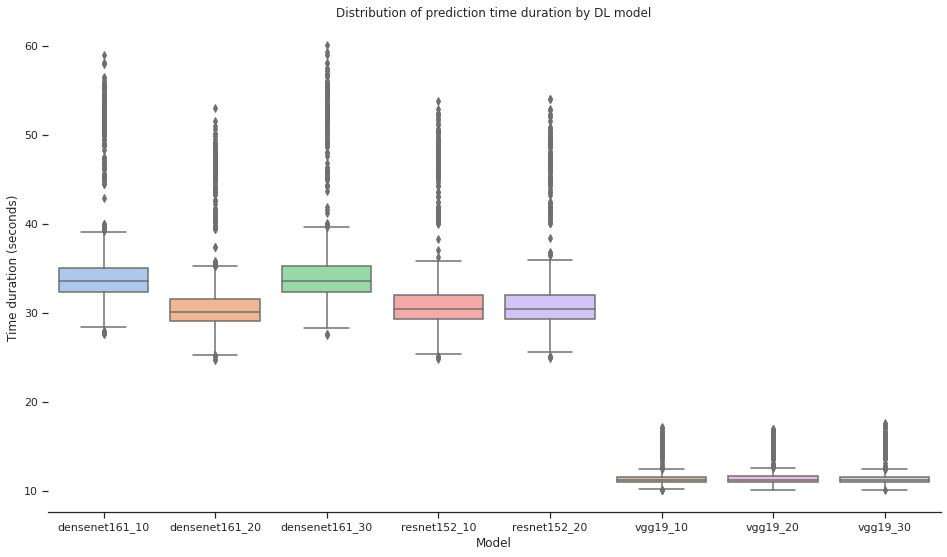

In [54]:
# Time analysis: what model is the fastest ?
# Merge data to ease plots with seaborn
data_2 = pd.concat([densenet161_10_df_all,
                 densenet161_20_df_all,
                 densenet161_30_df_all,
                 resnet152_10_df_all,
                 resnet152_20_df_all,
                 vgg19_10_df_all,
                 vgg19_20_df_all,
                 vgg19_30_df_all])
data_2["pred"] = data_2["pred"].astype(int).astype(str)

# boxplot comparison of the processing times across the models
plt.figure(figsize=(16, 9))
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=data_2, x="model", y="t")
sns.despine(left=True)
plt.ylabel("Time duration (seconds)")
plt.xlabel("Model")
plt.title("Distribution of prediction time duration by DL model")

In [55]:
data_2.groupby("model").t.describe()

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
densenet161_10,1779.0,34.774918,5.040944,27.68,32.325,33.56,35.065,58.93
densenet161_20,1779.0,31.207723,4.365197,24.77,29.060,30.10,31.545,53.03
densenet161_30,1779.0,34.903884,5.179544,27.55,32.405,33.57,35.310,60.06
resnet152_10,1779.0,31.613935,4.574306,24.85,29.345,30.45,32.010,53.77
resnet152_20,1779.0,31.588999,4.593364,25.00,29.335,30.44,32.000,54.07
vgg19_10,1779.0,11.592170,1.111659,10.12,11.060,11.29,11.650,17.22
vgg19_20,1779.0,11.593390,1.109442,10.14,11.050,11.30,11.670,17.02
vgg19_30,1779.0,11.581788,1.134801,10.13,11.040,11.29,11.630,17.69


The duration of data processing of our algorithm depends directly on the duration of the predicting step by our Deep Learning model. Indeed, in our pipeline, the two first steps (1/ turning the 3D image into 2D slices, and 2/ cropping 2D slices) are fixed and similar for all the methods we tested. 
From the figure "boxplot comparison of the processing times across the models" we observe that models with the VGG19 architecture are faster than models with densenet161 and resnet152 architectures. The highest time duration is 60.06 seconds. These times were computed on a GPU Nvidia RTX 3090 with CUDA (Compute Unified Device Architecture). 


# Checking predictions balanced between axes

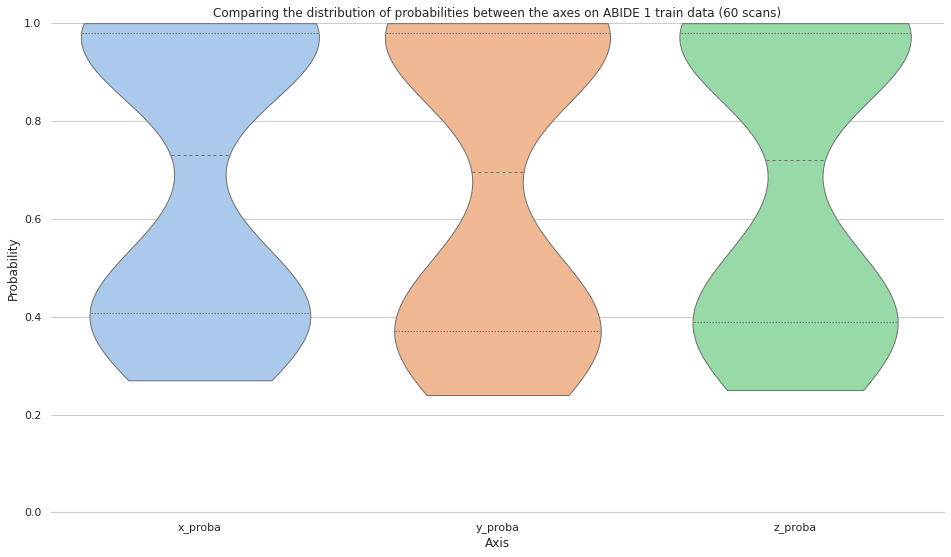

In [56]:
# TRAIN
path = "results/protopnet/train_full/resnet152/19112020/10push0.8167.pth/"

df_group_train = pd.read_csv(os.path.join(path, "group_results.csv"))

# Distribution of x_proba, y_proba, z_proba
data2 = pd.melt(df_group_train[['x_proba', 'y_proba', 'z_proba']])
plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid", palette="pastel")
sns.violinplot(data=data2, x="variable", y="value",
               split=True, inner="quart", linewidth=1, cut=0)
sns.despine(left=True)
plt.title("Comparing the distribution of probabilities between the axes on ABIDE 1 train data (60 scans)")
plt.xlabel("Axis")
plt.ylabel("Probability")
plt.ylim(0, 1)

df_group_train["dataset"] = ["train"]*df_group_train.shape[0]

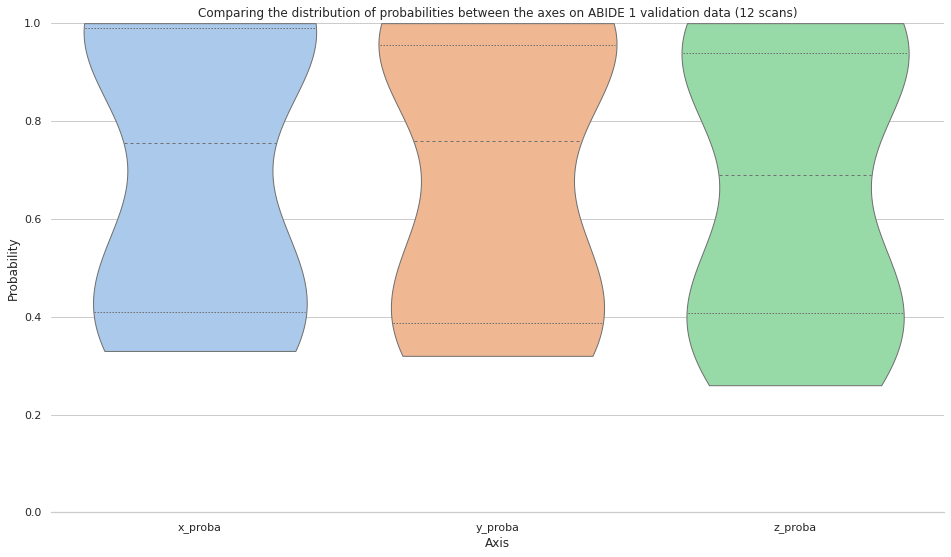

In [57]:
# VAL
path = "results/protopnet/val_full/resnet152/19112020/10push0.8167.pth/"
df_group_val = pd.read_csv(os.path.join(path, "group_results.csv"))

# Distribution of x_proba, y_proba, z_proba
data2 = pd.melt(df_group_val[['x_proba', 'y_proba', 'z_proba']])
plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid", palette="pastel")
sns.violinplot(data=data2, x="variable", y="value",
               split=True, inner="quart", linewidth=1, cut=0)
sns.despine(left=True)
plt.title("Comparing the distribution of probabilities between the axes on ABIDE 1 validation data (12 scans)")
plt.xlabel("Axis")
plt.ylabel("Probability")
plt.ylim(0, 1)

df_group_val["dataset"] = ["val"]*df_group_val.shape[0]

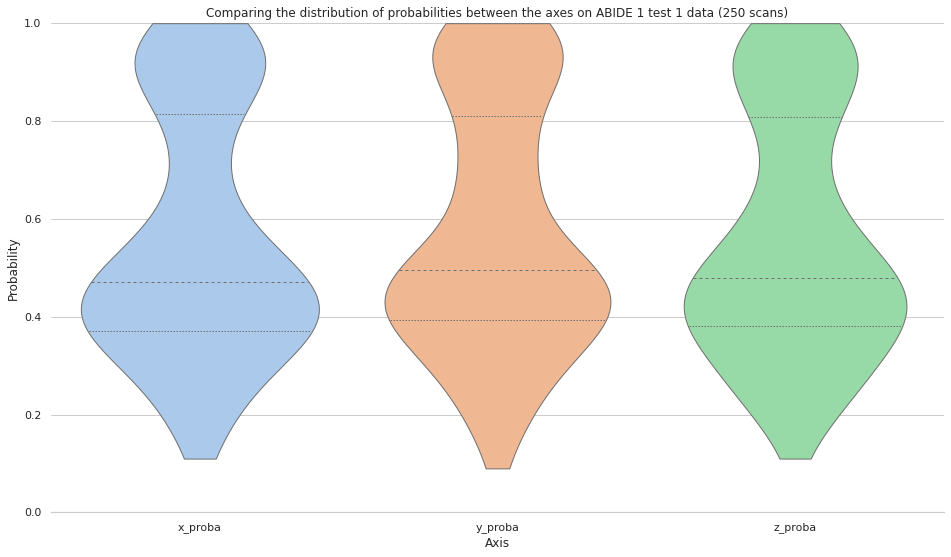

In [58]:
# TEST 1
path = "results/protopnet/testset1/resnet152/19112020/10push0.8167.pth/"
df_group_test1 = pd.read_csv(os.path.join(path, "group_results.csv"))

# Distribution of x_proba, y_proba, z_proba
data2 = pd.melt(df_group_test1[['x_proba', 'y_proba', 'z_proba']])
plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid", palette="pastel")
sns.violinplot(data=data2, x="variable", y="value",
               split=True, inner="quart", linewidth=1, cut=0)
sns.despine(left=True)
plt.title("Comparing the distribution of probabilities between the axes on ABIDE 1 test 1 data (250 scans)")
plt.xlabel("Axis")
plt.ylabel("Probability")
plt.ylim(0, 1)

df_group_test1["dataset"] = ["test1"]*df_group_test1.shape[0]

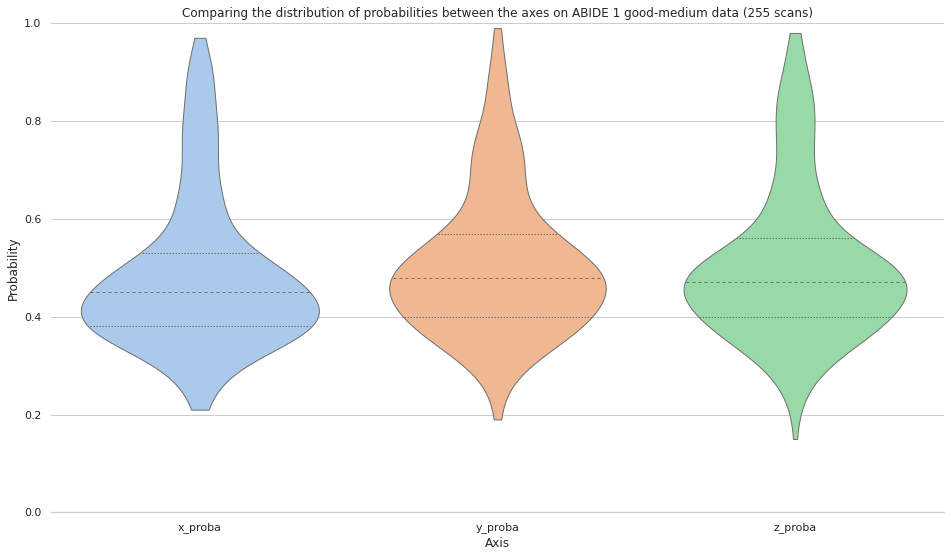

In [59]:
# TEST 3 Good-Medium
path = "results/protopnet/testset3_good_medium/resnet152/19112020/10push0.8167.pth/"
df_group_test3_good_medium = pd.read_csv(os.path.join(path, "group_results.csv"))

# Distribution of x_proba, y_proba, z_proba
data2 = pd.melt(df_group_test3_good_medium[['x_proba', 'y_proba', 'z_proba']])
plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid", palette="pastel")
sns.violinplot(data=data2, x="variable", y="value",
               split=True, inner="quart", linewidth=1, cut=0)
sns.despine(left=True)
plt.title("Comparing the distribution of probabilities between the axes on ABIDE 1 good-medium data (255 scans)")
plt.xlabel("Axis")
plt.ylabel("Probability")
plt.ylim(0, 1)

df_group_test3_good_medium["dataset"] = ["test3_good_medium"]*df_group_test3_good_medium.shape[0]

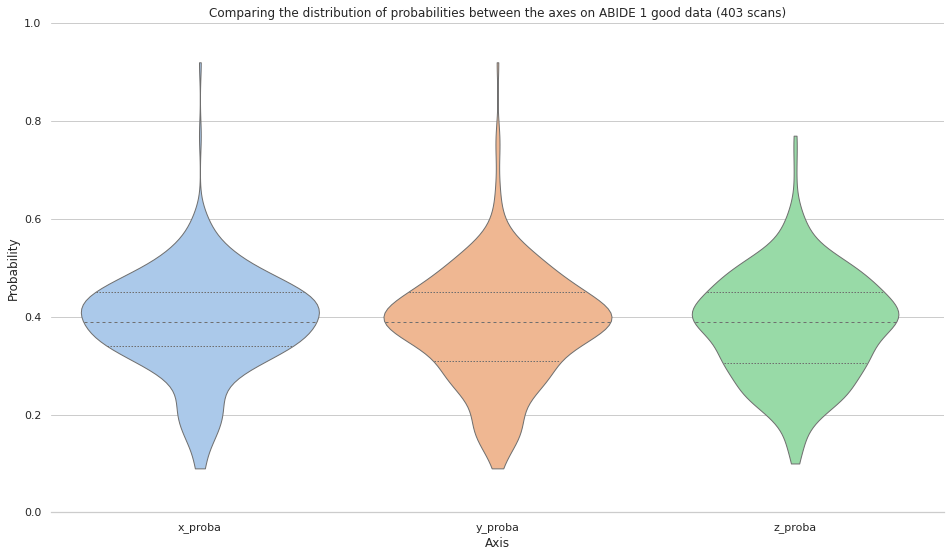

In [60]:
# TEST 3 Good
path1 = "results/protopnet/testset3_good_part1/resnet152/19112020/10push0.8167.pth/"
path2 = "results/protopnet/testset3_good_part2/resnet152/19112020/10push0.8167.pth/"
df_group_test3_good = pd.read_csv(os.path.join(path1, "group_results.csv"))
df_group_test3_good = pd.concat([df_group_test3_good, pd.read_csv(os.path.join(path2, "group_results.csv"))], axis=0, ignore_index=True)

# Distribution of x_proba, y_proba, z_proba
data2 = pd.melt(df_group_test3_good[['x_proba', 'y_proba', 'z_proba']])
plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid", palette="pastel")
sns.violinplot(data=data2, x="variable", y="value",
               split=True, inner="quart", linewidth=1, cut=0)
sns.despine(left=True)
plt.title("Comparing the distribution of probabilities between the axes on ABIDE 1 good data (403 scans)")
plt.xlabel("Axis")
plt.ylabel("Probability")
plt.ylim(0, 1)

df_group_test3_good["dataset"] = ["test3_good"]*df_group_test3_good.shape[0]

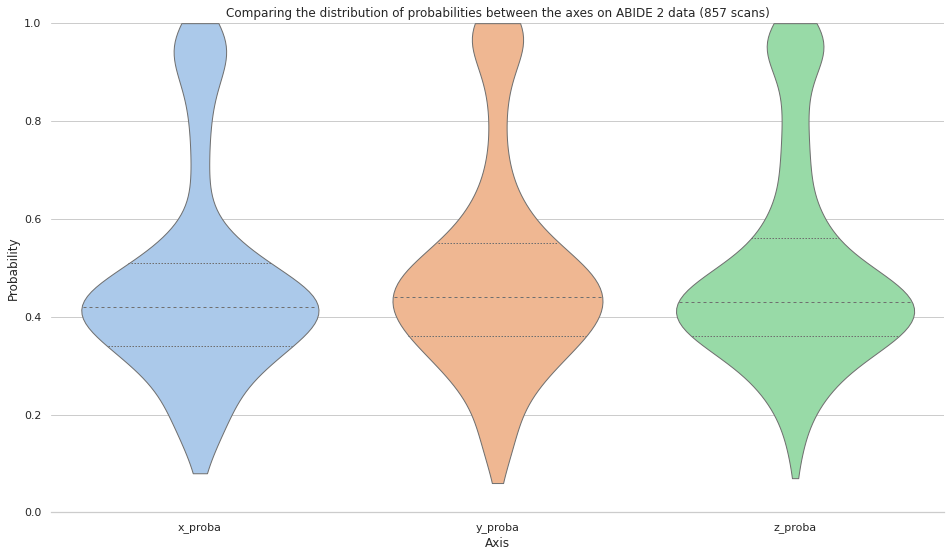

In [61]:
# ABIDE 2 
path = "results/protopnet/abide2/resnet152/19112020/10push0.8167.pth/"
df_group_abide2 = pd.read_csv(os.path.join(path, "group_results.csv"))

# Distribution of x_proba, y_proba, z_proba
data2 = pd.melt(df_group_abide2[['x_proba', 'y_proba', 'z_proba']])
plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid", palette="pastel")
sns.violinplot(data=data2, x="variable", y="value",
               split=True, inner="quart", linewidth=1, cut=0)
sns.despine(left=True)
plt.title("Comparing the distribution of probabilities between the axes on ABIDE 2 data (857 scans)")
plt.xlabel("Axis")
plt.ylabel("Probability")
plt.ylim(0, 1)

df_group_abide2["dataset"] = ["abide2"]*df_group_abide2.shape[0]

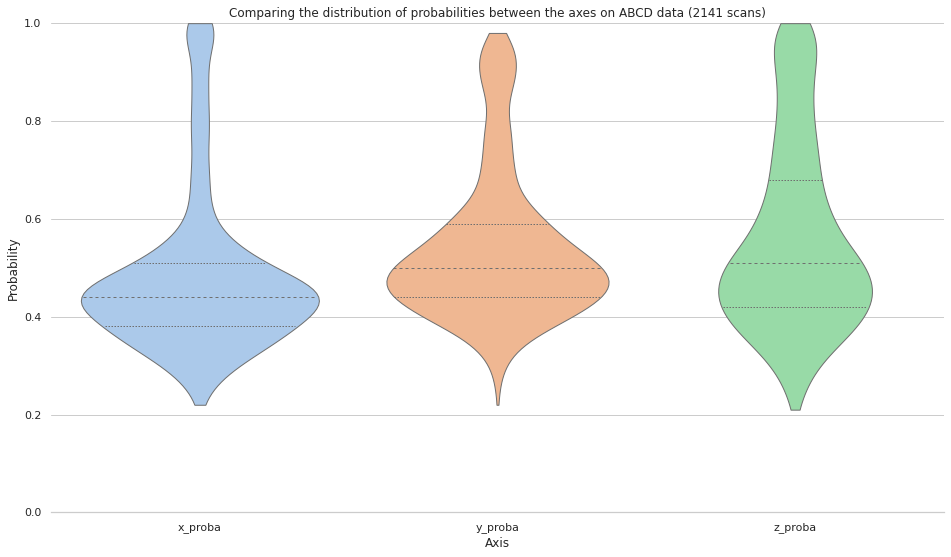

In [62]:
# ABCD
path = "results/protopnet/abcd_global_analysis_logs"

df_group_abcd = pd.read_csv(os.path.join(path, "group_results.csv"))

# Distribution of x_proba, y_proba, z_proba
data2 = pd.melt(df_group_abcd[['x_proba', 'y_proba', 'z_proba']])
plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid", palette="pastel")
sns.violinplot(data=data2, x="variable", y="value",
               split=True, inner="quart", linewidth=1, cut=0)
sns.despine(left=True)
plt.title("Comparing the distribution of probabilities between the axes on ABCD data (2141 scans)")
plt.xlabel("Axis")
plt.ylabel("Probability")
plt.ylim(0, 1)

df_group_abcd["dataset"] = ["abcd"]*df_group_abcd.shape[0]


# Get subids to check ABIDE 1 locar ringing or erasement

In [63]:
df_local_annotations = pd.read_csv("annotations/local_annotations.csv")

In [64]:
all_subids_locally_annotated = df_local_annotations['globally bad, combination of all effects'].value_counts().index.tolist()
all_subids_locally_annotated = all_subids_locally_annotated + df_local_annotations['bad ringing/im sharpness but medium cnr'].value_counts().index.tolist()
all_subids_locally_annotated = all_subids_locally_annotated + df_local_annotations['CNR medium'].value_counts().index.tolist()
all_subids_locally_annotated = all_subids_locally_annotated + df_local_annotations['local erasement'].value_counts().index.tolist()
all_subids_locally_annotated = all_subids_locally_annotated + df_local_annotations['local ringing'].value_counts().index.tolist()
all_subids_locally_annotated = all_subids_locally_annotated + df_local_annotations['medium to bad image sharpness'].value_counts().index.tolist()
all_subids_locally_annotated = all_subids_locally_annotated + df_local_annotations['CNR good'].value_counts().index.tolist()
all_subids_locally_annotated = all_subids_locally_annotated + pd.read_csv("annotations/subids_less_damaged.csv", header=None)[0].tolist()

all_subids_locally_annotated = list(set(all_subids_locally_annotated))

In [65]:
len(all_subids_locally_annotated)

422

In [66]:
subids_local_ringing = df_local_annotations["local ringing"].value_counts().index

In [67]:
subids_local_erasement = df_local_annotations["local erasement"].value_counts().index

In [68]:
subids_local_ringing_or_erasement = list(set(subids_local_ringing) | set(subids_local_erasement))

In [69]:
subids_globally_bad = df_local_annotations['globally bad, combination of all effects'].value_counts().index

In [70]:
len(df_local_annotations["bad ringing/im sharpness but medium cnr"].value_counts().index)

62

In [71]:
len(df_local_annotations["CNR medium"].value_counts().index)

39

In [72]:
len(df_local_annotations["medium to bad image sharpness"].value_counts().index)

39

In [73]:
len(df_local_annotations["CNR good"].value_counts().index)

26

In [74]:
len(df_local_annotations["bad ringing/im sharpness but medium cnr"].value_counts().index)

62

In [75]:
subids_globally_medium_damaged = df_local_annotations["bad ringing/im sharpness but medium cnr"].value_counts().index
subids_globally_medium_damaged = list(set(subids_globally_medium_damaged).difference(set(subids_local_ringing_or_erasement)))

In [76]:
# pd.DataFrame(subids_local_ringing_or_erasement).to_csv("./subids_local_ringing_or_erasement.csv", header=False, index=False)
# pd.DataFrame(subids_globally_medium_damaged).to_csv("./subids_globally_medium_damaged.csv", header=False, index=False)

# Studying subids globally medium damaged and subids local ringing or erasement

In [77]:
df_group_all = pd.concat([df_group_train, df_group_val, df_group_test1, 
                          df_group_test3_good_medium, df_group_test3_good,
                          df_group_abide2, df_group_abcd], axis=0, ignore_index=True)

In [78]:
df_globally_medium_damaged = df_group_all[[x in subids_globally_medium_damaged for x in df_group_all.subid]]
df_globally_medium_damaged.shape

(51, 13)

In [79]:
df_local_ringing_or_erasement = df_group_all[[x in subids_local_ringing_or_erasement for x in df_group_all.subid]]
df_local_ringing_or_erasement.shape

(60, 13)

In [80]:
df_globally_bad = df_group_all[[x in subids_globally_bad for x in df_group_all.subid]]
df_globally_bad["damaged"] = ["globally damaged"]*df_globally_bad.shape[0]
df_globally_bad.shape

/tmp/ipykernel_13899/2085255763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_globally_bad["damaged"] = ["globally damaged"]*df_globally_bad.shape[0]


(36, 14)

In [81]:
df_other_annotated_precisely = df_group_all[[(x in all_subids_locally_annotated) & (x not in subids_globally_medium_damaged) & (x not in subids_local_ringing_or_erasement) & (x not in subids_globally_bad) for x in df_group_all.subid]]
df_other_annotated_precisely["damaged"] = ["other less damaged scans"]*df_other_annotated_precisely.shape[0]
df_other_annotated_precisely.shape

/tmp/ipykernel_13899/2717610255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_other_annotated_precisely["damaged"] = ["other less damaged scans"]*df_other_annotated_precisely.shape[0]


(269, 14)

In [82]:
df_other_annotated_precisely.head()

,subid,proba,t,slices,axes,x_proba,y_proba,z_proba,pred,x_pred,y_pred,z_pred,dataset,damaged
72,Pitt-0050003,0.686667,35.51,"[2, 4, 7, 10, 17, 18, 22, 25, 26, 27, 28, 29, ...","['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', ...",0.66,0.80,0.60,1.0,1.0,1.0,1.0,test1,other less damaged scans
86,Stanford-0051182,0.460000,28.58,"[0, 1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15...","['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', ...",0.57,0.43,0.38,0.0,1.0,0.0,0.0,test1,other less damaged scans
98,Yale-0050627,0.490000,28.81,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', ...",0.49,0.47,0.51,0.0,0.0,0.0,1.0,test1,other less damaged scans
115,Yale-0050577,0.486667,30.97,"[0, 1, 2, 3, 4, 7, 10, 11, 12, 13, 16, 17, 18,...","['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', ...",0.44,0.55,0.47,0.0,0.0,1.0,0.0,test1,other less damaged scans
119,Leuven-2-0050750,0.823333,33.70,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 16,...","['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', ...",0.75,0.81,0.91,1.0,1.0,1.0,1.0,test1,other less damaged scans


In [83]:
set(subids_local_ringing_or_erasement).difference(set(df_group_all.subid))

{'Stanford-0051169',
 'Stanford-0051171',
 'Stanford-0051181',
 'Stanford-0051184',
 'UM-1-0050290',
 'UM-1-0050296'}

In [84]:
df_globally_medium_damaged.proba.describe()

count    51.000000
mean      0.886078
std       0.103386
min       0.586667
25%       0.865000
50%       0.930000
75%       0.948333
max       0.986667
Name: proba, dtype: float64

In [85]:
df_local_ringing_or_erasement.proba.describe()

count    60.000000
mean      0.673056
std       0.186635
min       0.370000
25%       0.508333
50%       0.628333
75%       0.841667
max       0.986667
Name: proba, dtype: float64

In [86]:
df_local_ringing_or_erasement["damaged"] = ["local_ringing_or_erasement"]*df_local_ringing_or_erasement.shape[0]
df_globally_medium_damaged["damaged"] = ["globally_medium_damaged"]*df_globally_medium_damaged.shape[0]

/tmp/ipykernel_13899/1370030279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_local_ringing_or_erasement["damaged"] = ["local_ringing_or_erasement"]*df_local_ringing_or_erasement.shape[0]
/tmp/ipykernel_13899/1370030279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_globally_medium_damaged["damaged"] = ["globally_medium_damaged"]*df_globally_medium_damaged.shape[0]


Text(0.5, 1.0, 'Comparing the distribution of probabilities between different levels of intensities among scans precisely annotated with artefacts (51+60+36+269 scans)')

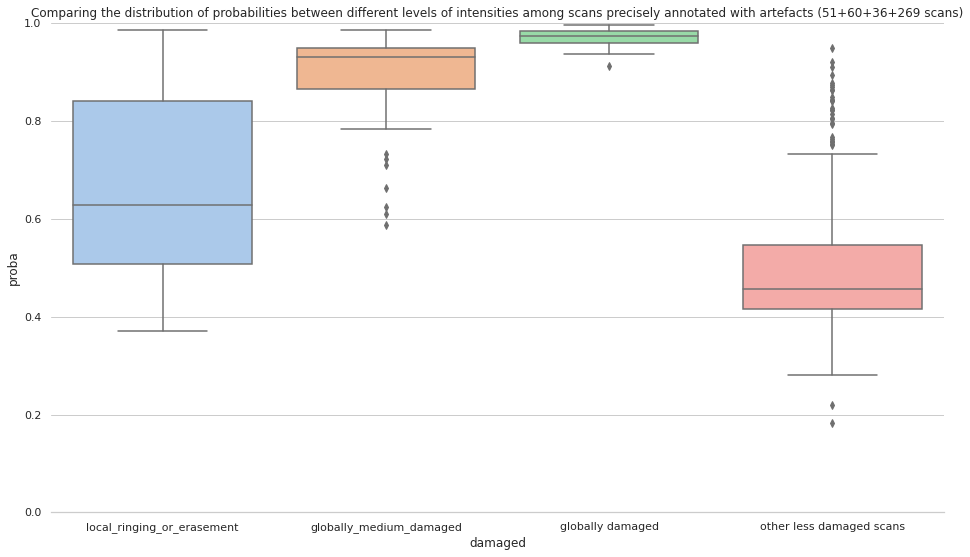

In [87]:
data2 = pd.concat([df_local_ringing_or_erasement[["damaged", "proba", "x_proba", "y_proba", "z_proba"]], 
                  df_globally_medium_damaged[["damaged", "proba", "x_proba", "y_proba", "z_proba"]],
                  df_globally_bad[["damaged", "proba", "x_proba", "y_proba", "z_proba"]],
                  df_other_annotated_precisely[["damaged", "proba", "x_proba", "y_proba", "z_proba"]]],
                axis=0)

plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid", palette="pastel")
sns.boxplot(data=data2, x="damaged", y="proba")
sns.despine(left=True)
plt.ylim(0,1)
plt.title("Comparing the distribution of probabilities between different levels of intensities among scans precisely annotated with artefacts (51+60+36+269 scans)")

In [88]:
results_local_preds_local_ringing_erasement = pd.read_csv("annotations/subids_local_ringing_or_erasement3.csv")
results_local_preds_local_ringing_erasement.columns = ["id", "x", "y", "z", "observation", "pred_x", "pred_y", "pred_z"]

In [89]:
results_local_preds_local_ringing_erasement.pred_x.value_counts()

Coherent / pred 1 out brain      59
Incoherent / pred 1 out brain     6
incoherent                        1
Name: pred_x, dtype: int64

In [90]:
results_local_preds_local_ringing_erasement.pred_y.value_counts()

Coherent / pred 1 out brain      57
Incoherent / pred 1 out brain     8
incoherent                        1
Name: pred_y, dtype: int64

In [91]:
results_local_preds_local_ringing_erasement.pred_z.value_counts()

Coherent / pred 1 out brain      52
Incoherent / pred 1 out brain    13
incoherent                        1
Name: pred_z, dtype: int64

In [92]:
results_local_preds_local_ringing_erasement.shape

(66, 8)

In [93]:
52/66

0.7878787878787878

# Predictions comparison between MRIQC classifier and our models: percentage of difference? 

In [94]:
# Predictions comparison between MRIQC classifier and our models: percentage of difference? 
print("densenet161_10\n", (densenet161_10_df_all.pred - MRIQC_CLF_T1w_df_all3.pred).value_counts())
print("\n")
print("densenet161_20\n", (densenet161_20_df_all.pred - MRIQC_CLF_T1w_df_all3.pred).value_counts())
print("\n")
print("densenet161_30\n", (densenet161_30_df_all.pred - MRIQC_CLF_T1w_df_all3.pred).value_counts())
print("\n")

print("resnet152_10\n", (resnet152_10_df_all.pred - MRIQC_CLF_T1w_df_all3.pred).value_counts())
print("\n")
print("resnet152_20\n", (resnet152_20_df_all.pred - MRIQC_CLF_T1w_df_all3.pred).value_counts())
print("\n")

print("vgg19_10\n", (vgg19_10_df_all.pred - MRIQC_CLF_T1w_df_all3.pred).value_counts())
print("\n")
print("vgg19_20\n", (vgg19_20_df_all.pred - MRIQC_CLF_T1w_df_all3.pred).value_counts())
print("\n")
print("vgg19_30\n", (vgg19_30_df_all.pred - MRIQC_CLF_T1w_df_all3.pred).value_counts())

densenet161_10
  0.0    1445
-1.0     265
 1.0      69
Name: pred, dtype: int64


densenet161_20
  0.0    1452
-1.0     306
 1.0      21
Name: pred, dtype: int64


densenet161_30
  0.0    1434
-1.0     337
 1.0       8
Name: pred, dtype: int64


resnet152_10
  0.0    1375
-1.0     209
 1.0     195
Name: pred, dtype: int64


resnet152_20
  0.0    1462
-1.0     265
 1.0      52
Name: pred, dtype: int64


vgg19_10
  0.0    1449
-1.0     287
 1.0      43
Name: pred, dtype: int64


vgg19_20
  0.0    1454
-1.0     256
 1.0      69
Name: pred, dtype: int64


vgg19_30
  0.0    1456
-1.0     235
 1.0      88
Name: pred, dtype: int64


From these results, we can deduce that MRIQC tends to predict more damaged scans than our models. We should verify if scans predicted damaged by MRIQC are false positives or are truly damaged.
Similarly, we should verify that scans predicted damaged by our models (and undamaged by MRIQC) are not false positives.

Are the scans predicted damaged by MRIQC (see -1 results) similar across our models? Are they damaged according to our annotation?

In [95]:
diff_d10 = densenet161_10_df_all.pred - MRIQC_CLF_T1w_df_all3.pred
diff_d20 = densenet161_20_df_all.pred - MRIQC_CLF_T1w_df_all3.pred
diff_d30 = densenet161_30_df_all.pred - MRIQC_CLF_T1w_df_all3.pred

diff_r10 = resnet152_10_df_all.pred - MRIQC_CLF_T1w_df_all3.pred
diff_r20 = resnet152_20_df_all.pred - MRIQC_CLF_T1w_df_all3.pred

diff_v10 = vgg19_10_df_all.pred - MRIQC_CLF_T1w_df_all3.pred
diff_v20 = vgg19_20_df_all.pred - MRIQC_CLF_T1w_df_all3.pred
diff_v30 = vgg19_30_df_all.pred - MRIQC_CLF_T1w_df_all3.pred

In [96]:
L_diff = [diff_d10, diff_d20, diff_d30, diff_r10, diff_r20, diff_v10, diff_v20, diff_v30]
L_names = ["d10", "d20", "d30", "r10", "r20", "v10", "v20", "v30"]
df_diff = pd.DataFrame({"d1": [], "d2": [], "n_d1_-1": [], 
                        "n_d2_-1": [], "n_d1_d2_-1": [], "%_d1": [], "%_d2": []})
for i, d1 in enumerate(L_diff):
    for j, d2 in enumerate(L_diff):
        if i == j:
            continue
        n1 = d1[d1 == -1].shape[0]
        n2 = d2[d2 == -1].shape[0]
        n12 = len(set(d1[d1 == -1].index) & set(d2[d2 == -1].index))
        df_diff = pd.concat([df_diff, pd.DataFrame({"d1": [L_names[i]], "d2": [L_names[j]], "n_d1_-1": [n1], 
                                                    "n_d2_-1": [n2], "n_d1_d2_-1": [n12],
                                                    "%_d1": [round(n12*100/n1, 2)], "%_d2": [round(n12*100/n2, 2)]})])

In [97]:
df_diff

,d1,d2,n_d1_-1,n_d2_-1,n_d1_d2_-1,%_d1,%_d2
0,d10,d20,265.0,306.0,265.0,100.00,86.60
0,d10,d30,265.0,337.0,265.0,100.00,78.64
0,d10,r10,265.0,209.0,209.0,78.87,100.00
0,d10,r20,265.0,265.0,259.0,97.74,97.74
0,d10,v10,265.0,287.0,262.0,98.87,91.29
0,d10,v20,265.0,256.0,256.0,96.60,100.00
0,d10,v30,265.0,235.0,235.0,88.68,100.00
0,d20,d10,306.0,265.0,265.0,86.60,100.00
0,d20,d30,306.0,337.0,306.0,100.00,90.80
0,d20,r10,306.0,209.0,209.0,68.30,100.00


In [98]:
df_diff.groupby("d1")["%_d1"].describe()

,count,mean,std,min,25%,50%,75%,max
d1,,,,,,,,
d10,7.0,94.394286,7.880308,78.87,92.640,97.74,99.435,100.0
d20,7.0,85.107143,10.450114,68.30,80.230,86.60,90.195,100.0
d30,7.0,77.278571,9.488559,62.02,72.845,78.64,81.900,90.8
r10,7.0,99.931429,0.181423,99.52,100.000,100.00,100.000,100.0
r20,7.0,94.124286,7.793662,78.87,91.885,97.74,99.245,100.0
v10,7.0,89.447143,9.679316,72.82,85.540,90.94,95.645,100.0
v20,7.0,95.982857,6.997632,81.64,95.120,100.00,100.000,100.0
v30,7.0,98.358571,4.342812,88.51,100.000,100.00,100.000,100.0


Globally, scans predicted damaged by MRIQC but predicted undamaged by our models are similar accross our models.

In [99]:
L_diff = [diff_d10, diff_d20, diff_d30, diff_r10, diff_r20, diff_v10, diff_v20, diff_v30]
L_names = ["d10", "d20", "d30", "r10", "r20", "v10", "v20", "v30"]
df_diff = pd.DataFrame({"d1": [], "d2": [], "n_d1_1": [], 
                        "n_d2_1": [], "n_d1_d2_1": [], "%_d1": [], "%_d2": []})
for i, d1 in enumerate(L_diff):
    for j, d2 in enumerate(L_diff):
        if i == j:
            continue
        n1 = d1[d1 == 1].shape[0]
        n2 = d2[d2 == 1].shape[0]
        n12 = len(set(d1[d1 == 1].index) & set(d2[d2 == 1].index))
        df_diff = pd.concat([df_diff, pd.DataFrame({"d1": [L_names[i]], "d2": [L_names[j]], "n_d1_1": [n1], 
                                                    "n_d2_1": [n2], "n_d1_d2_1": [n12],
                                                    "%_d1": [round(n12*100/n1, 2)], "%_d2": [round(n12*100/n2, 2)]})])

In [100]:
df_diff.groupby("d1")["%_d1"].describe()

,count,mean,std,min,25%,50%,75%,max
d1,,,,,,,,
d10,7.0,63.972857,32.873966,11.59,44.200,72.46,87.680,100.00
d20,7.0,89.797143,23.070733,38.10,95.240,100.00,100.000,100.00
d30,7.0,100.000000,0.000000,100.00,100.000,100.00,100.000,100.00
r10,7.0,25.567143,14.427843,4.10,16.410,26.67,35.380,44.62
r20,7.0,74.724286,33.887687,15.38,57.690,96.15,98.080,100.00
v10,7.0,78.072857,32.940171,18.60,67.445,93.02,100.000,100.00
v20,7.0,65.630000,33.770428,11.59,46.375,73.91,90.580,100.00
v30,7.0,55.841429,31.480949,9.09,36.360,57.95,76.135,98.86


Globally, scans predicted damaged by our models and predicted undamaged by MRIQC are different over the models. We will need to check these scans, and see if the predictions could be due to the different levels of variety of the prototypes in every model. 

In [101]:
# Percentage of slices predicted damaged and the fact they are in the border for every axis

# ROC AUC and Accuracy scores on train, validation and test sets 

In [102]:
data

,pred,proba,subid,model,dataset
0,0,27.980647,28741,MRIQC_CLF,ABIDE 2 set
1,0,23.471746,28742,MRIQC_CLF,ABIDE 2 set
2,0,21.940849,28743,MRIQC_CLF,ABIDE 2 set
3,0,33.708196,28744,MRIQC_CLF,ABIDE 2 set
4,0,46.782542,28745,MRIQC_CLF,ABIDE 2 set
...,...,...,...,...,...
1774,0,16.330000,51583,vgg19_30,ABIDE 1 test set 2 good
1775,0,15.000000,51584,vgg19_30,ABIDE 1 test set 2 good
1776,0,18.330000,51585,vgg19_30,ABIDE 1 test set 2 good
1777,0,19.670000,51606,vgg19_30,ABIDE 1 test set 2 good


In [103]:
# Accuracy, ROC AUC score on testset
df_train_ids = pd.read_csv("./partids_train_full.csv", header=None)
df_train_ids["subid"] = df_train_ids[0].apply(lambda s: int(s.split("-")[-1]))
df_train_ids.drop(0, axis=1, inplace=True)
df_val_ids = pd.read_csv("./partids_val_full.csv", header=None)
df_val_ids["subid"] = df_val_ids[0].apply(lambda s: int(s.split("-")[-1]))
df_val_ids.drop(0, axis=1, inplace=True)
# Adding y_true column
df_train_ids["y_true"] = [0 if "undamaged" in df_manual_annotations_bad_good[df_manual_annotations_bad_good["subid"] == subid]["damaged/undamaged"].iloc[0] else 1 for subid in df_train_ids["subid"]]
df_val_ids["y_true"] = [0 if "undamaged" in df_manual_annotations_bad_good[df_manual_annotations_bad_good["subid"] == subid]["damaged/undamaged"].iloc[0] else 1 for subid in df_val_ids["subid"]]
# Merging with data
df_train_ids = pd.merge(data, df_train_ids, on=["subid"])
df_val_ids = pd.merge(data, df_val_ids, on=["subid"])

In [104]:
import sklearn.metrics as sm

subdf = df_train_ids[df_train_ids["model"] == "MRIQC_CLF"]
print("MRIQC_CLF")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))
print("roc auc: ", round(sm.roc_auc_score(subdf["y_true"], subdf["proba"]), 4))
print("\n")
subdf = df_train_ids[df_train_ids["model"] == "densenet161_10"]
print("densenet161_10")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))
print("roc auc: ", round(sm.roc_auc_score(subdf["y_true"], subdf["proba"]), 4))
print("\n")
subdf = df_train_ids[df_train_ids["model"] == "densenet161_20"]
print("densenet161_20")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))
print("roc auc: ", round(sm.roc_auc_score(subdf["y_true"], subdf["proba"]), 4))
print("\n")
subdf = df_train_ids[df_train_ids["model"] == "densenet161_30"]
print("densenet161_30")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))
print("roc auc: ", round(sm.roc_auc_score(subdf["y_true"], subdf["proba"]), 4))
print("\n")
subdf = df_train_ids[df_train_ids["model"] == "resnet152_10"]
print("resnet152_10")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))
print("roc auc: ", round(sm.roc_auc_score(subdf["y_true"], subdf["proba"]), 4))
print("\n")
subdf = df_train_ids[df_train_ids["model"] == "resnet152_20"]
print("resnet152_20")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))
print("roc auc: ", round(sm.roc_auc_score(subdf["y_true"], subdf["proba"]), 4))
print("\n")
subdf = df_train_ids[df_train_ids["model"] == "vgg19_10"]
print("vgg19_10")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))
print("roc auc: ", round(sm.roc_auc_score(subdf["y_true"], subdf["proba"]), 4))
print("\n")
subdf = df_train_ids[df_train_ids["model"] == "vgg19_20"]
print("vgg19_20")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))
print("roc auc: ", round(sm.roc_auc_score(subdf["y_true"], subdf["proba"]), 4))
print("\n")
subdf = df_train_ids[df_train_ids["model"] == "vgg19_30"]
print("vgg19_30")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))
print("roc auc: ", round(sm.roc_auc_score(subdf["y_true"], subdf["proba"]), 4))
print("\n")

MRIQC_CLF
accuracy:  0.7667
roc auc:  0.9667


densenet161_10
accuracy:  1.0
roc auc:  1.0


densenet161_20
accuracy:  1.0
roc auc:  1.0


densenet161_30
accuracy:  1.0
roc auc:  1.0


resnet152_10
accuracy:  1.0
roc auc:  1.0


resnet152_20
accuracy:  1.0
roc auc:  1.0


vgg19_10
accuracy:  1.0
roc auc:  1.0


vgg19_20
accuracy:  1.0
roc auc:  1.0


vgg19_30
accuracy:  1.0
roc auc:  1.0




In [105]:
subdf = df_val_ids[df_val_ids["model"] == "MRIQC_CLF"]
print("MRIQC_CLF")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))
print("roc auc: ", round(sm.roc_auc_score(subdf["y_true"], subdf["proba"]), 4))
print("\n")
subdf = df_val_ids[df_val_ids["model"] == "densenet161_10"]
print("densenet161_10")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))
print("roc auc: ", round(sm.roc_auc_score(subdf["y_true"], subdf["proba"]), 4))
print("\n")
subdf = df_val_ids[df_val_ids["model"] == "densenet161_20"]
print("densenet161_20")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))
print("roc auc: ", round(sm.roc_auc_score(subdf["y_true"], subdf["proba"]), 4))
print("\n")
subdf = df_val_ids[df_val_ids["model"] == "densenet161_30"]
print("densenet161_30")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))
print("roc auc: ", round(sm.roc_auc_score(subdf["y_true"], subdf["proba"]), 4))
print("\n")
subdf = df_val_ids[df_val_ids["model"] == "resnet152_10"]
print("resnet152_10")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))
print("roc auc: ", round(sm.roc_auc_score(subdf["y_true"], subdf["proba"]), 4))
print("\n")
subdf = df_val_ids[df_val_ids["model"] == "resnet152_20"]
print("resnet152_20")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))
print("roc auc: ", round(sm.roc_auc_score(subdf["y_true"], subdf["proba"]), 4))
print("\n")
subdf = df_val_ids[df_val_ids["model"] == "vgg19_10"]
print("vgg19_10")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))
print("roc auc: ", round(sm.roc_auc_score(subdf["y_true"], subdf["proba"]), 4))
print("\n")
subdf = df_val_ids[df_val_ids["model"] == "vgg19_20"]
print("vgg19_20")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))
print("roc auc: ", round(sm.roc_auc_score(subdf["y_true"], subdf["proba"]), 4))
print("\n")
subdf = df_val_ids[df_val_ids["model"] == "vgg19_30"]
print("vgg19_30")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))
print("roc auc: ", round(sm.roc_auc_score(subdf["y_true"], subdf["proba"]), 4))
print("\n")

MRIQC_CLF
accuracy:  1.0
roc auc:  1.0


densenet161_10
accuracy:  1.0
roc auc:  1.0


densenet161_20
accuracy:  1.0
roc auc:  1.0


densenet161_30
accuracy:  1.0
roc auc:  1.0


resnet152_10
accuracy:  1.0
roc auc:  1.0


resnet152_20
accuracy:  1.0
roc auc:  1.0


vgg19_10
accuracy:  1.0
roc auc:  1.0


vgg19_20
accuracy:  1.0
roc auc:  1.0


vgg19_30
accuracy:  1.0
roc auc:  1.0




In [106]:
df_manual_annotations_bad_good["y_true"] = [0 if "undamaged" in df_manual_annotations_bad_good[df_manual_annotations_bad_good["subid"] == subid]["damaged/undamaged"].iloc[0] else 1 for subid in df_manual_annotations_bad_good["subid"]]
df_manual_annotations_bad_good_test = df_manual_annotations_bad_good[[subid not in list(set(df_train_ids.subid) | set(df_val_ids.subid)) for subid in df_manual_annotations_bad_good.subid]]

In [107]:
len(set(df_manual_annotations_bad_good_test.subid))

908

In [108]:
subdf = df_manual_annotations_bad_good_test[df_manual_annotations_bad_good_test["model"] == "MRIQC_CLF"]
print("MRIQC_CLF")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))
print("roc auc: ", round(sm.roc_auc_score(subdf["y_true"], subdf["proba"]), 4))
print("\n")
subdf = df_manual_annotations_bad_good_test[df_manual_annotations_bad_good_test["model"] == "densenet161_10"]
print("densenet161_10")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))
print("roc auc: ", round(sm.roc_auc_score(subdf["y_true"], subdf["proba"]), 4))
print("\n")
subdf = df_manual_annotations_bad_good_test[df_manual_annotations_bad_good_test["model"] == "densenet161_20"]
print("densenet161_20")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))
print("roc auc: ", round(sm.roc_auc_score(subdf["y_true"], subdf["proba"]), 4))
print("\n")
subdf = df_manual_annotations_bad_good_test[df_manual_annotations_bad_good_test["model"] == "densenet161_30"]
print("densenet161_30")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))
print("roc auc: ", round(sm.roc_auc_score(subdf["y_true"], subdf["proba"]), 4))
print("\n")
subdf = df_manual_annotations_bad_good_test[df_manual_annotations_bad_good_test["model"] == "resnet152_10"]
print("resnet152_10")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))
print("roc auc: ", round(sm.roc_auc_score(subdf["y_true"], subdf["proba"]), 4))
print("\n")
subdf = df_manual_annotations_bad_good_test[df_manual_annotations_bad_good_test["model"] == "resnet152_20"]
print("resnet152_20")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))
print("roc auc: ", round(sm.roc_auc_score(subdf["y_true"], subdf["proba"]), 4))
print("\n")
subdf = df_manual_annotations_bad_good_test[df_manual_annotations_bad_good_test["model"] == "vgg19_10"]
print("vgg19_10")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))
print("roc auc: ", round(sm.roc_auc_score(subdf["y_true"], subdf["proba"]), 4))
print("\n")
subdf = df_manual_annotations_bad_good_test[df_manual_annotations_bad_good_test["model"] == "vgg19_20"]
print("vgg19_20")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))
print("roc auc: ", round(sm.roc_auc_score(subdf["y_true"], subdf["proba"]), 4))
print("\n")
subdf = df_manual_annotations_bad_good_test[df_manual_annotations_bad_good_test["model"] == "vgg19_30"]
print("vgg19_30")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))
print("roc auc: ", round(sm.roc_auc_score(subdf["y_true"], subdf["proba"]), 4))
print("\n")

MRIQC_CLF
accuracy:  0.7037
roc auc:  0.7236


densenet161_10
accuracy:  0.6982
roc auc:  0.7751


densenet161_20
accuracy:  0.6465
roc auc:  0.7738


densenet161_30
accuracy:  0.62
roc auc:  0.7578


resnet152_10
accuracy:  0.7544
roc auc:  0.8247


resnet152_20
accuracy:  0.6872
roc auc:  0.8107


vgg19_10
accuracy:  0.6718
roc auc:  0.8229


vgg19_20
accuracy:  0.7004
roc auc:  0.8494


vgg19_30
accuracy:  0.7181
roc auc:  0.8472




In [109]:
df_manual_annotations["y_true"] = [0 if "undamaged" in df_manual_annotations[df_manual_annotations["subid"] == subid]["damaged/undamaged"].iloc[0] else 1 for subid in df_manual_annotations["subid"]]
df_manual_annotations_test = df_manual_annotations[[subid not in list(set(df_train_ids.subid) | set(df_val_ids.subid)) for subid in df_manual_annotations.subid]]

In [110]:
df_manual_annotations_test.shape[0]/9

380.0

In [111]:
subdf = df_manual_annotations_test[df_manual_annotations_test["model"] == "MRIQC_CLF"]
print("MRIQC_CLF")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))

print("\n")
subdf = df_manual_annotations_test[df_manual_annotations_test["model"] == "densenet161_10"]
print("densenet161_10")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))

print("\n")
subdf = df_manual_annotations_test[df_manual_annotations_test["model"] == "densenet161_20"]
print("densenet161_20")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))

print("\n")
subdf = df_manual_annotations_test[df_manual_annotations_test["model"] == "densenet161_30"]
print("densenet161_30")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))

print("\n")
subdf = df_manual_annotations_test[df_manual_annotations_test["model"] == "resnet152_10"]
print("resnet152_10")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))

print("\n")
subdf = df_manual_annotations_test[df_manual_annotations_test["model"] == "resnet152_20"]
print("resnet152_20")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))

print("\n")
subdf = df_manual_annotations_test[df_manual_annotations_test["model"] == "vgg19_10"]
print("vgg19_10")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))

print("\n")
subdf = df_manual_annotations_test[df_manual_annotations_test["model"] == "vgg19_20"]
print("vgg19_20")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))

print("\n")
subdf = df_manual_annotations_test[df_manual_annotations_test["model"] == "vgg19_30"]
print("vgg19_30")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))

print("\n")

MRIQC_CLF
accuracy:  0.4158


densenet161_10
accuracy:  0.2868


densenet161_20
accuracy:  0.1553


densenet161_30
accuracy:  0.0921


resnet152_10
accuracy:  0.4789


resnet152_20
accuracy:  0.2579


vgg19_10
accuracy:  0.2211


vgg19_20
accuracy:  0.2974


vgg19_30
accuracy:  0.3474




In [112]:
df_manual_annotations_good["y_true"] = [0 if "undamaged" in df_manual_annotations_good[df_manual_annotations_good["subid"] == subid]["damaged/undamaged"].iloc[0] else 1 for subid in df_manual_annotations_good["subid"]]
df_manual_annotations_good_test = df_manual_annotations_good[[subid not in list(set(df_train_ids.subid) | set(df_val_ids.subid)) for subid in df_manual_annotations_good.subid]]

In [113]:
df_manual_annotations_good_test.shape[0]/9

528.0

In [114]:
subdf = df_manual_annotations_good_test[df_manual_annotations_good_test["model"] == "MRIQC_CLF"]
print("MRIQC_CLF")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))

print("\n")
subdf = df_manual_annotations_good_test[df_manual_annotations_good_test["model"] == "densenet161_10"]
print("densenet161_10")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))

print("\n")
subdf = df_manual_annotations_good_test[df_manual_annotations_good_test["model"] == "densenet161_20"]
print("densenet161_20")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))

print("\n")
subdf = df_manual_annotations_good_test[df_manual_annotations_good_test["model"] == "densenet161_30"]
print("densenet161_30")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))

print("\n")
subdf = df_manual_annotations_good_test[df_manual_annotations_good_test["model"] == "resnet152_10"]
print("resnet152_10")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))

print("\n")
subdf = df_manual_annotations_good_test[df_manual_annotations_good_test["model"] == "resnet152_20"]
print("resnet152_20")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))

print("\n")
subdf = df_manual_annotations_good_test[df_manual_annotations_good_test["model"] == "vgg19_10"]
print("vgg19_10")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))

print("\n")
subdf = df_manual_annotations_good_test[df_manual_annotations_good_test["model"] == "vgg19_20"]
print("vgg19_20")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))

print("\n")
subdf = df_manual_annotations_good_test[df_manual_annotations_good_test["model"] == "vgg19_30"]
print("vgg19_30")
print("accuracy: ", round(sm.accuracy_score(subdf["y_true"], subdf["pred"].astype(int)), 4))

print("\n")

MRIQC_CLF
accuracy:  0.911


densenet161_10
accuracy:  0.9943


densenet161_20
accuracy:  1.0


densenet161_30
accuracy:  1.0


resnet152_10
accuracy:  0.9527


resnet152_20
accuracy:  0.9962


vgg19_10
accuracy:  0.9962


vgg19_20
accuracy:  0.9905


vgg19_30
accuracy:  0.9848




From these scores, we understand that our models tend to predict better good quality scans. The model that predicts well the presence of artifacts are resnet152_10 (acc = 0.48) and MRIQC_CLF (acc = 0.42), knowing that this comparison is not totally fair because, as a remind, the entire ABIDE dataset served to train the MRIQC model.
The low accuracy scores might also show that such a score is not appropriate to measure the performance of the model because there are different levels of intensity of artifacts. Moreover, for certain model, we might miss information because of the unfortunate limitation in the variety of prototypes randomly picked from the trainset.

In [115]:
len(set(df_manual_annotations.subid))

416

In [116]:
df_manual_annotations_good.shape[0]/9 

564.0

# Multisite effect ABIDE 1 test set

In [117]:
df_pheno_abide1 = pd.read_csv("pheno_files/abide1_data_pheno.csv")[["SUB_ID", "SITE_ID"]]

In [118]:
df_pheno_abide1.head()

,SUB_ID,SITE_ID
0,50002,PITT
1,50003,PITT
2,50004,PITT
3,50005,PITT
4,50006,PITT


In [119]:
df_pheno_abide1

,SUB_ID,SITE_ID
0,50002,PITT
1,50003,PITT
2,50004,PITT
3,50005,PITT
4,50006,PITT
...,...,...
1107,51583,SBL
1108,51584,SBL
1109,51585,SBL
1110,51606,MAX_MUN


In [120]:
data_2[data_2.model == "vgg19_30"]

,pred,proba,subid,t,model
0,0,25.33,28741,11.18,vgg19_30
1,0,12.67,28742,11.40,vgg19_30
2,0,14.67,28743,11.24,vgg19_30
3,0,12.67,28744,11.43,vgg19_30
4,1,94.00,28745,11.11,vgg19_30
...,...,...,...,...,...
1774,0,16.33,51583,11.06,vgg19_30
1775,0,15.00,51584,10.82,vgg19_30
1776,0,18.33,51585,10.83,vgg19_30
1777,0,19.67,51606,11.20,vgg19_30


In [121]:
# ABIDE 1 - Data description - Demographics
df_abide1_demog = pd.read_csv("pheno_files/abide1_data_pheno.csv")
df_abide1_demog = df_abide1_demog[[el in data_2.subid.tolist() for el in df_abide1_demog.SUB_ID]]

df_abide1_demog.columns


print("Age:")
print(df_abide1_demog["AGE_AT_SCAN"].describe())
print("Gender:")
print(df_abide1_demog["SEX"].value_counts())
print("Samples:")
print(df_abide1_demog["SITE_ID"].value_counts())

Age:
count    980.000000
mean      16.982652
std        7.961519
min        6.470000
25%       11.590000
50%       14.656500
75%       20.000000
max       64.000000
Name: AGE_AT_SCAN, dtype: float64
Gender:
1    833
2    147
Name: SEX, dtype: int64
Samples:
NYU         170
UM_1        102
USM          68
UCLA_1       64
YALE         55
PITT         51
KKI          48
TRINITY      45
MAX_MUN      45
CALTECH      36
STANFORD     34
SDSU         34
UM_2         34
LEUVEN_2     34
SBL          30
LEUVEN_1     29
OLIN         28
CMU          27
UCLA_2       24
OHSU         22
Name: SITE_ID, dtype: int64


In [122]:
df_pheno_abide2 = pd.read_csv("pheno_files/abide2_pheno_all.csv", index_col=0)[["SITE_ID", "SUB_ID"]]

In [123]:
df_pheno_abide2.head()

,SITE_ID,SUB_ID
0,ABIDEII-BNI_1,29006
1,ABIDEII-BNI_1,29007
2,ABIDEII-BNI_1,29008
3,ABIDEII-BNI_1,29009
4,ABIDEII-BNI_1,29010


In [124]:
db_scan_params_abide = pd.read_csv("pheno_files/ABIDE_db_params_anat.csv")
db_scan_params_abide["dataset"] = db_scan_params_abide.site.apply(lambda x: x.split("-")[0]) 
db_scan_params_abide["site_id"] = db_scan_params_abide.site.apply(lambda x: "-".join((x.split("-")[-1]).split("_")).upper()) 


In [125]:
db_scan_params_abide.dataset.value_counts()

ABIDE_II    23
ABIDE_I     19
ABIDE__I     1
Name: dataset, dtype: int64

In [126]:
df_manual_annotations_bad_good_test["SITE_ID"] = [df_pheno_abide1[df_pheno_abide1.SUB_ID == x].SITE_ID.item() for x in df_manual_annotations_bad_good_test.subid]
df_manual_annotations_test["SITE_ID"] = [df_pheno_abide1[df_pheno_abide1.SUB_ID == x].SITE_ID.item() for x in df_manual_annotations_test.subid]
df_manual_annotations_good_test["SITE_ID"] = [df_pheno_abide1[df_pheno_abide1.SUB_ID == x].SITE_ID.item() for x in df_manual_annotations_good_test.subid]

/tmp/ipykernel_13899/1618891631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_manual_annotations_bad_good_test["SITE_ID"] = [df_pheno_abide1[df_pheno_abide1.SUB_ID == x].SITE_ID.item() for x in df_manual_annotations_bad_good_test.subid]
/tmp/ipykernel_13899/1618891631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_manual_annotations_test["SITE_ID"] = [df_pheno_abide1[df_pheno_abide1.SUB_ID == x].SITE_ID.item() for x in df_manual_annotations_test.subid]
/tmp/ipykernel_13899/1618891631.py:3: 

In [127]:
df_manual_annotations_bad_good_test.SITE_ID.value_counts()

NYU         1530
UM_1         702
USM          576
UCLA_1       558
YALE         477
PITT         441
TRINITY      405
KKI          378
MAX_MUN      369
CALTECH      324
LEUVEN_2     306
SDSU         270
SBL          270
LEUVEN_1     261
STANFORD     252
UM_2         252
CMU          243
OLIN         198
OHSU         198
UCLA_2       162
Name: SITE_ID, dtype: int64

In [128]:
data2 = pd.concat([df_local_ringing_or_erasement[["subid", "damaged", "proba", "x_proba", "y_proba", "z_proba"]], 
                  df_globally_medium_damaged[["subid", "damaged", "proba", "x_proba", "y_proba", "z_proba"]],
                  df_globally_bad[["subid", "damaged", "proba", "x_proba", "y_proba", "z_proba"]],
                  df_other_annotated_precisely[["subid", "damaged", "proba", "x_proba", "y_proba", "z_proba"]]],
                axis=0)

In [129]:
data2["subid_only"] = data2["subid"].apply(lambda x: int(x.split("-")[-1]))
data2["site"] = data2["subid"].apply(lambda x: "_".join(x.split("-")[:-1]).upper())

In [130]:
db_scan_params_abide[(db_scan_params_abide.dataset == "ABIDE_I") | (db_scan_params_abide.dataset == "ABIDE__I")].sort_values("site_id")

,site,scan_type,manufacturer,model,headcoil,field_strength,sequence,flip_angle,snr,inversion_time,...,number_of_measurements,acquisition_time,fat_suppression,number_of_directions,number_of_B_zeros,B_values,averages,reconstructed_voxels_dimensions,dataset,site_id
20,ABIDE_I-Caltech,anat,Siemens,MAGNETOM TrioTim syngo MR B17,NaN,3T,3D TFL,10.0,1.0,800.0,...,1.0,03:43:00,water excit. Fast,NaN,NaN,NaN,1.0,"1,0x1,0x1,0",ABIDE_I,CALTECH
21,ABIDE_I-CMU,anat,Siemens,MAGNETOM Verio syngo MR B17,NaN,NaN,3D TFL,8.0,1.0,1100.0,...,1.0,04:21:00,no,NaN,NaN,NaN,NaN,"1,0x1,0x1,0",ABIDE_I,CMU
42,ABIDE_I-KKI,anat,Philips,Achieva,8Ch,3T,MPRAGE,8.0,NaN,843.0,...,NaN,"08:08,30",no,NaN,NaN,NaN,NaN,"1,0x1,0x1,0",ABIDE_I,KKI
32,ABIDE_I-Leuven1,anat,Philips,Intera,8Ch,3T,NaN,8.0,NaN,885.0,...,NaN,"06:22,80",no,NaN,NaN,NaN,NaN,"0.98x0.98x1,2",ABIDE_I,LEUVEN1
33,ABIDE_I-Leuven2,anat,Philips,Intera,8Ch,3T,NaN,8.0,NaN,885.0,...,NaN,"06:22,80",no,NaN,NaN,NaN,NaN,"0.98x0.98x1,2",ABIDE_I,LEUVEN2
22,ABIDE_I-MaxMun,anat,Siemens,MAGNETOM Verio syngo MR B17,NaN,NaN,3D TFL,9.0,1.0,900.0,...,1.0,03:41:00,no,NaN,NaN,NaN,1.0,"1,0x1,0x1,0",ABIDE_I,MAXMUN
23,ABIDE__I-NYU,anat,Siemens,MAGNETOM Allegra syngo MR 2004A,NaN,NaN,3D TFL,7.0,1.0,1100.0,...,1.0,08:07:00,no,NaN,NaN,NaN,1.0,"1,3x1,0x1,3",ABIDE__I,NYU
19,ABIDE_I-OHSU,anat,Siemens,MAGNETOM TrioTim syngo MR B17,NaN,3T,3D TFL,10.0,NaN,900.0,...,1.0,09:14:00,NaN,NaN,NaN,NaN,1.0,"1,0x1,0x1,1",ABIDE_I,OHSU
24,ABIDE_I-Olin,anat,Siemens,MAGNETOM Allegra syngo MR 2004A,NaN,NaN,3D TFL,8.0,1.0,900.0,...,NaN,07:37:00,no,NaN,NaN,NaN,NaN,"1,0x1,0x1,0",ABIDE_I,OLIN
25,ABIDE_I-Pitt,anat,Siemens,MAGNETOM Allegra syngo MR A30,NaN,NaN,3D TFL,7.0,1.0,1000.0,...,1.0,08:59:00,no,NaN,NaN,NaN,NaN,"1,1x1,1x1,1",ABIDE_I,PITT


In [131]:
data2.groupby("site").damaged.value_counts()

site      damaged                   
CALTECH   other less damaged scans       2
CMU_A     other less damaged scans       1
CMU_B     other less damaged scans       2
KKI       other less damaged scans      14
          globally damaged               3
          globally_medium_damaged        3
LEUVEN_1  other less damaged scans       2
LEUVEN_2  other less damaged scans      10
          local_ringing_or_erasement     1
MAXMUN_A  other less damaged scans       2
MAXMUN_B  other less damaged scans       2
MAXMUN_C  other less damaged scans       3
MAXMUN_D  other less damaged scans       3
          globally damaged               2
          globally_medium_damaged        2
          local_ringing_or_erasement     1
NYU       other less damaged scans      70
          local_ringing_or_erasement    17
          globally_medium_damaged        1
OLIN      other less damaged scans       7
          globally damaged               3
          local_ringing_or_erasement     2
          globall

In [132]:
data2.head()

,subid,damaged,proba,x_proba,y_proba,z_proba,subid_only,site
73,Stanford-0051167,local_ringing_or_erasement,0.706667,0.79,0.78,0.55,51167,STANFORD
80,UM-2-0050383,local_ringing_or_erasement,0.493333,0.60,0.49,0.39,50383,UM_2
81,Pitt-0050033,local_ringing_or_erasement,0.696667,0.67,0.81,0.61,50033,PITT
83,Stanford-0051164,local_ringing_or_erasement,0.970000,1.00,0.99,0.92,51164,STANFORD
92,UM-1-0050280,local_ringing_or_erasement,0.430000,0.50,0.45,0.34,50280,UM_1


In [133]:
df_manual_annotations_test["damaged"] = [data2[data2.subid_only == x].damaged.item() for x in df_manual_annotations_test.subid]

/tmp/ipykernel_13899/245805680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_manual_annotations_test["damaged"] = [data2[data2.subid_only == x].damaged.item() for x in df_manual_annotations_test.subid]


In [134]:
print("RESNET152_10, ABIDE 1 test set - damaged scans (380 scans)\n")
subdf = df_manual_annotations_test[df_manual_annotations_test["model"] == "resnet152_10"]
subdf.sort_values("SITE_ID", ignore_index=True, inplace=True)
for damaged_type in list(set(df_manual_annotations_test["damaged"])):
    print(damaged_type)
    for site in np.sort(list(set(subdf.SITE_ID))):
        sub_subdf = subdf[(subdf.SITE_ID == site) & (subdf.damaged == damaged_type)]
        print(site, ": accuracy: ", round(sm.accuracy_score(sub_subdf["y_true"], sub_subdf["pred"].astype(int)), 4))
        print("nb of scans: ", sub_subdf.shape[0])
    print("\n")

RESNET152_10, ABIDE 1 test set - damaged scans (380 scans)

globally_medium_damaged
CALTECH : accuracy:  nan
nb of scans:  0
CMU : accuracy:  nan
nb of scans:  0
KKI : accuracy:  1.0
nb of scans:  3
LEUVEN_1 : accuracy:  nan
nb of scans:  0
LEUVEN_2 : accuracy:  nan
nb of scans:  0
MAX_MUN : accuracy:  1.0
nb of scans:  2
NYU : accuracy:  1.0
nb of scans:  1
OLIN : accuracy:  1.0
nb of scans:  1
PITT : accuracy:  nan
nb of scans:  0
SBL : accuracy:  nan
nb of scans:  0
SDSU : accuracy:  1.0
nb of scans:  10
STANFORD : accuracy:  1.0
nb of scans:  10
TRINITY : accuracy:  1.0
nb of scans:  3
UCLA_1 : accuracy:  1.0
nb of scans:  6
UCLA_2 : accuracy:  1.0
nb of scans:  3
UM_1 : accuracy:  1.0
nb of scans:  7
UM_2 : accuracy:  nan
nb of scans:  0
USM : accuracy:  nan
nb of scans:  0
YALE : accuracy:  1.0
nb of scans:  5


local_ringing_or_erasement
CALTECH : accuracy:  nan
nb of scans:  0
CMU : accuracy:  nan
nb of scans:  0
KKI : accuracy:  nan
nb of scans:  0
LEUVEN_1 : accuracy:  nan
nb

/home/mleanie/p3_pytorch/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/home/mleanie/p3_pytorch/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/mleanie/p3_pytorch/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/mleanie/p3_pytorch/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/mleanie/p3_pytorch/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/mlean

In [135]:
print("RESNET152_10, ABIDE 1 test set - undamaged scans (528 scans)\n")
subdf = df_manual_annotations_good_test[df_manual_annotations_good_test["model"] == "resnet152_10"]
subdf.sort_values("SITE_ID", ignore_index=True, inplace=True)
for site in np.sort(list(set(subdf.SITE_ID))):
    sub_subdf = subdf[subdf.SITE_ID == site]
    print(site, ": accuracy: ", round(sm.accuracy_score(sub_subdf["y_true"], sub_subdf["pred"].astype(int)), 4))
    print("nb of scans: ", sub_subdf.shape[0], "\n")

RESNET152_10, ABIDE 1 test set - undamaged scans (528 scans)

CALTECH : accuracy:  1.0
nb of scans:  34 

CMU : accuracy:  1.0
nb of scans:  24 

KKI : accuracy:  1.0
nb of scans:  25 

LEUVEN_1 : accuracy:  0.9259
nb of scans:  27 

LEUVEN_2 : accuracy:  0.9565
nb of scans:  23 

MAX_MUN : accuracy:  0.9286
nb of scans:  28 

NYU : accuracy:  0.9146
nb of scans:  82 

OHSU : accuracy:  0.9091
nb of scans:  22 

OLIN : accuracy:  0.75
nb of scans:  12 

PITT : accuracy:  0.9524
nb of scans:  21 

SBL : accuracy:  1.0
nb of scans:  26 

SDSU : accuracy:  0.8
nb of scans:  10 

TRINITY : accuracy:  1.0
nb of scans:  34 

UCLA_1 : accuracy:  0.8958
nb of scans:  48 

UCLA_2 : accuracy:  1.0
nb of scans:  7 

UM_1 : accuracy:  1.0
nb of scans:  27 

UM_2 : accuracy:  1.0
nb of scans:  13 

USM : accuracy:  1.0
nb of scans:  60 

YALE : accuracy:  1.0
nb of scans:  5 



/home/mleanie/p3_pytorch/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [136]:
# print("RESNET152_10, ABIDE 1 test set - damaged scans (380 scans)\n")
# subdf = df_manual_annotations_test[df_manual_annotations_test["model"] == "resnet152_10"]
# subdf.sort_values("SITE_ID", ignore_index=True, inplace=True)
# for site in np.sort(list(set(subdf.SITE_ID))):
#     sub_subdf = subdf[subdf.SITE_ID == site]
#     print(site, ": accuracy: ", round(sm.accuracy_score(sub_subdf["y_true"], sub_subdf["pred"].astype(int)), 4))
#     print("nb of scans: ", sub_subdf.shape[0], "\n")

In [137]:
# print("RESNET152_10, ABIDE 1 test set (908 scans)\n")
# subdf = df_manual_annotations_bad_good_test[df_manual_annotations_bad_good_test["model"] == "resnet152_10"]
# subdf.sort_values("SITE_ID", ignore_index=True, inplace=True)
# for site in list(set(subdf.SITE_ID)):
#     sub_subdf = subdf[subdf.SITE_ID == site]
#     print(site, ": accuracy: ", round(sm.accuracy_score(sub_subdf["y_true"], sub_subdf["pred"].astype(int)), 4))
#     print("nb of scans: ", sub_subdf.shape[0], "\n")

# Validation on ABIDE 2 data

In [138]:
subdf = data[(data.dataset == "ABIDE 2 set") & ((data.model == "MRIQC_CLF") | (data.model == "resnet152_10"))]
subdf

,pred,proba,subid,model,dataset
0,0,27.980647,28741,MRIQC_CLF,ABIDE 2 set
1,0,23.471746,28742,MRIQC_CLF,ABIDE 2 set
2,0,21.940849,28743,MRIQC_CLF,ABIDE 2 set
3,0,33.708196,28744,MRIQC_CLF,ABIDE 2 set
4,0,46.782542,28745,MRIQC_CLF,ABIDE 2 set
...,...,...,...,...,...
794,1,52.330000,30163,resnet152_10,ABIDE 2 set
795,0,43.670000,30164,resnet152_10,ABIDE 2 set
796,0,45.000000,30165,resnet152_10,ABIDE 2 set
797,0,48.000000,30166,resnet152_10,ABIDE 2 set


Text(0.5, 1.0, 'Comparing the distribution of probabilities between MRIQC and proto-ResNet152-10ep on ABIDE 2(799 scans)')

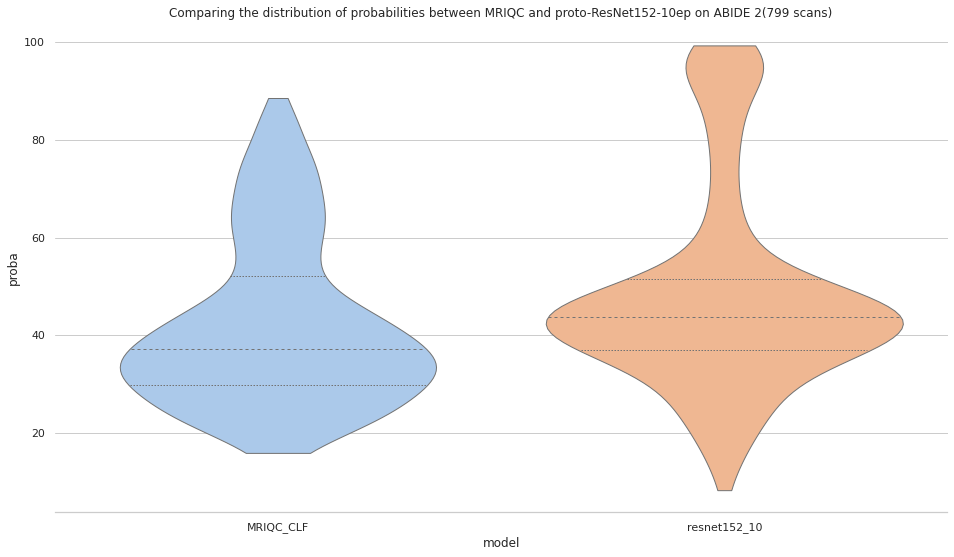

In [139]:
plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid", palette="pastel")
sns.violinplot(data=subdf, x="model", y="proba",
               split=True, inner="quart", linewidth=1, cut=0)
sns.despine(left=True)
plt.title("Comparing the distribution of probabilities between MRIQC and proto-ResNet152-10ep on ABIDE 2(799 scans)")

In [140]:
subdf.groupby("model").pred.value_counts()

model         pred
MRIQC_CLF     0       588
              1       211
resnet152_10  0       590
              1       209
Name: pred, dtype: int64

In [141]:
subids_mriqc_pred_1 = subdf[(subdf.model == "MRIQC_CLF") & (subdf.pred == "1")].subid
subids_resnet152_pred_1 = subdf[(subdf.model == "resnet152_10") & (subdf.pred == "1")].subid

subids_mriqc_pred_0 = subdf[(subdf.model == "MRIQC_CLF") & (subdf.pred == "0")].subid
subids_resnet152_pred_0 = subdf[(subdf.model == "resnet152_10") & (subdf.pred == "0")].subid


In [142]:
subdf.pred.value_counts()

0    1178
1     420
Name: pred, dtype: int64

In [143]:
len(set(subids_mriqc_pred_1) & set(subids_resnet152_pred_1))

112

In [144]:
len(set(subids_mriqc_pred_0) & set(subids_resnet152_pred_0))

491

In [145]:
sm.accuracy_score(y_true=subdf[(subdf.model == "MRIQC_CLF")].sort_values("subid", ignore_index=True).pred.astype(int).tolist(), 
                  y_pred=subdf[(subdf.model == "resnet152_10")].sort_values("subid", ignore_index=True).pred.astype(int).tolist())

0.7546933667083855

In [146]:
sm.roc_auc_score(y_true=subdf[(subdf.model == "MRIQC_CLF")].sort_values("subid", ignore_index=True).pred.astype(int).tolist(), 
                  y_score=subdf[(subdf.model == "resnet152_10")].sort_values("subid", ignore_index=True).proba.tolist())

0.7180457491053294

In [147]:
# Data description - Demographics
df_abide2_demog = pd.read_csv("pheno_files/abide2_pheno_all.csv", index_col=0)
df_abide2_demog = df_abide2_demog[[el in subdf.subid.tolist() for el in df_abide2_demog.SUB_ID]] 
df_abide2_demog.columns

print("Age:")
print(df_abide2_demog['AGE_AT_SCAN '].describe())
print("Gender:")
print(df_abide2_demog['SEX'].value_counts())
print("Samples:")
print(df_abide2_demog['SITE_ID'].value_counts())

Age:
count    799.000000
mean      13.621580
std        7.825448
min        5.128000
25%        9.032938
50%       11.000000
75%       14.685833
max       64.000000
Name: AGE_AT_SCAN , dtype: float64
Gender:
1    597
2    202
Name: SEX, dtype: int64
Samples:
ABIDEII-KKI_1     199
ABIDEII-GU_1      106
ABIDEII-OHSU_1     92
ABIDEII-NYU_1      73
ABIDEII-IP_1       52
ABIDEII-EMC_1      51
ABIDEII-TCD_1      40
ABIDEII-ETH_1      37
ABIDEII-IU_1       35
ABIDEII-UCD_1      29
ABIDEII-KUL_3      26
ABIDEII-USM_1      25
ABIDEII-NYU_2      25
ABIDEII-BNI_1       9
Name: SITE_ID, dtype: int64


# Validation on ABCD data

In [148]:
data[data.dataset == "ABIDE 2 set"].shape[0]/9

799.0

In [149]:
1600+2141

3741

In [150]:
df_res152_abcd = pd.read_csv("results/protopnet/abcd_global_analysis_logs/abcd_group_results.csv", index_col=0)

In [151]:
df_res152_abcd.shape

(2141, 6)

In [152]:
df_abcd_true = pd.read_csv("results/protopnet/abcd_global_analysis_logs/downloaded_files_info.csv")
df_abcd_true["subid"] = df_abcd_true.filename.apply(lambda x: x.split(".")[0])

In [153]:
df_abcd_preds = df_abcd_true.merge(df_res152_abcd, how='left', on='subid')[["qc_outcome", "proba", "pred"]]

In [154]:
df_abcd_true.shape

(2141, 4)

Text(0.5, 1.0, 'Comparing the distribution of probabilities between the true outcomes (2141 scans)')

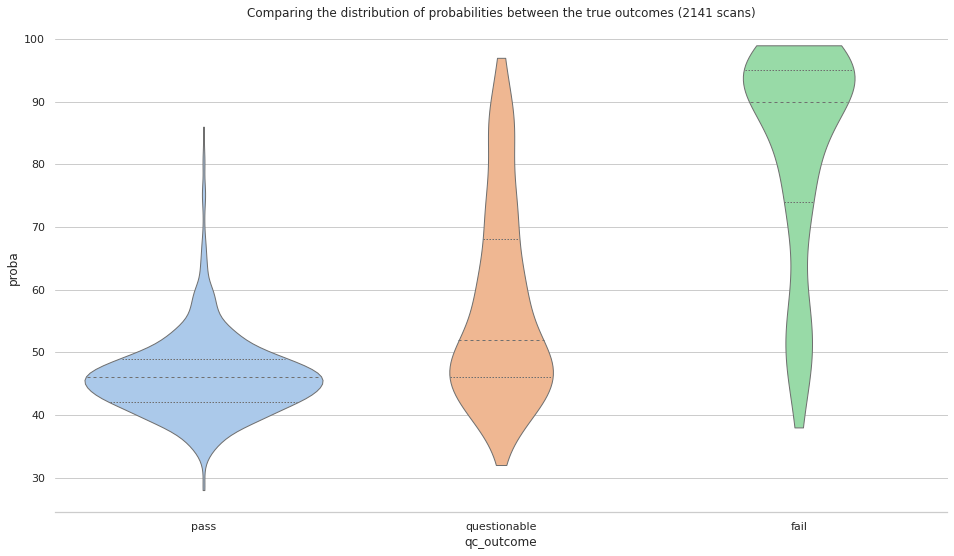

In [155]:
plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid", palette="pastel")
sns.violinplot(data=df_abcd_preds, x="qc_outcome", y="proba",
               split=True, inner="quart", linewidth=1, cut=0)
sns.despine(left=True)
plt.title("Comparing the distribution of probabilities between the true outcomes (2141 scans)")

In [156]:
df_abcd_preds.groupby("qc_outcome").pred.value_counts()

qc_outcome    pred
fail          1.0      181
              0.0       17
pass          0.0     1137
              1.0      243
questionable  1.0      304
              0.0      255
Name: pred, dtype: int64

In [157]:
181/(181+17)

0.9141414141414141

In [158]:
1137/(1137+243)

0.8239130434782609

In [159]:
df_abcd_preds.groupby("qc_outcome").proba.describe()

,count,mean,std,min,25%,50%,75%,max
qc_outcome,,,,,,,,
fail,198.0,82.500000,17.030504,38.0,74.0,90.0,95.0,99.0
pass,1380.0,46.204348,6.441817,28.0,42.0,46.0,49.0,86.0
questionable,559.0,57.542039,15.449928,32.0,46.0,52.0,68.0,97.0


In [187]:
# T-test
import pingouin as pg
# df_abcd_preds[df_abcd_preds.qc_outcome == "pass"]["proba"]

pg.normality(df_abcd_preds, dv="proba", group="qc_outcome")

,W,pval,normal
pass,0.908077,4.601729e-28,False
questionable,0.914098,2.896906e-17,False
fail,0.811022,9.392554e-15,False


In [188]:
pg.mwu(df_abcd_preds[df_abcd_preds.qc_outcome == "pass"]["proba"].values,
      df_abcd_preds[df_abcd_preds.qc_outcome == "fail"]["proba"].values)

,U-val,alternative,p-val,RBC,CLES
MWU,13814.5,two-sided,1.844010e-93,0.898884,0.050558


In [190]:
pg.mwu(df_abcd_preds[df_abcd_preds.qc_outcome == "pass"]["proba"].values,
      df_abcd_preds[df_abcd_preds.qc_outcome == "questionable"]["proba"].values)

,U-val,alternative,p-val,RBC,CLES
MWU,208800.0,two-sided,1.182771e-56,0.458661,0.27067


In [191]:
pg.mwu(df_abcd_preds[df_abcd_preds.qc_outcome == "fail"]["proba"].values,
      df_abcd_preds[df_abcd_preds.qc_outcome == "questionable"]["proba"].values)

,U-val,alternative,p-val,RBC,CLES
MWU,94121.5,two-sided,1.003895e-48,-0.700755,0.850378


TODO: 
- look at field of view !
- look at why questionnable
- look at other params...

In [160]:
df_mriqc_sub_abcd = pd.read_csv("results/mriqc/MRIQC_ABCD_subset_410.csv")

In [161]:
df_abcd_to_mriqc = pd.read_csv("results/mriqc/df_to_mriqc.csv", header=None)
df_abcd_to_mriqc.columns = ["subid", "subject_id", "qc_outcome", "proba", "pred"]

In [162]:
df_sub_abcd_preds = df_abcd_to_mriqc.merge(df_mriqc_sub_abcd, how='left', on='subject_id')
df_sub_abcd_preds["prob_y"] = df_sub_abcd_preds["prob_y"]*100 

In [163]:
df_sub_abcd_preds

,subid,subject_id,qc_outcome,proba,pred,prob_y,pred_y
0,20180406-ST001-MNBCP176427-v06-1-24mo_MR-SE002...,2170042,pass,45.0,0.0,46.027798,0
1,20180404-ST001-Elison_BSLERP_231205_06_01_MR-S...,2170130,pass,52.0,1.0,23.124081,0
2,20190725-ST001-MNBCP236452-v02-1-12mo_MR-SE012...,2170144,fail,96.0,1.0,57.041752,1
3,20190109-ST001-MNBCP251549-v01-1-16mo_MR-SE002...,2170179,questionable,48.0,0.0,23.702443,0
4,20151105-ST001-Elison_BSLERP_334324_03_01_MR-S...,2170297,pass,57.0,1.0,24.393747,0
...,...,...,...,...,...,...,...
405,BCP-862498-42mo-v1_15_T1w.nii.gz,2809394,pass,52.0,1.0,25.966983,0
406,BCP-862498-42mo-v1_32_T1w.nii.gz,2809403,pass,52.0,1.0,42.900397,0
407,BCP-862498-42mo-v1_33_T1w.nii.gz,2809404,pass,60.0,1.0,25.006892,0
408,NCBCP908754-v02-1-3mo_3_T1w.nii.gz,2809525,fail,87.0,1.0,54.875779,1


In [164]:
df_sub_abcd_preds.groupby("qc_outcome").pred_y.value_counts()

qc_outcome    pred_y
fail          0          51
              1          16
pass          0         265
              1          28
questionable  0          43
              1           7
Name: pred_y, dtype: int64

In [165]:
265/(265+28)

0.9044368600682594

count    17.000000
mean     45.764706
std       3.832907
min      38.000000
25%      44.000000
50%      46.000000
75%      49.000000
max      50.000000
Name: proba, dtype: float64
count    17.000000
mean     40.091685
std      15.850712
min      23.810851
25%      31.575471
50%      35.981445
75%      41.291104
max      79.139803
Name: prob_y, dtype: float64


(0.0, 100.0)

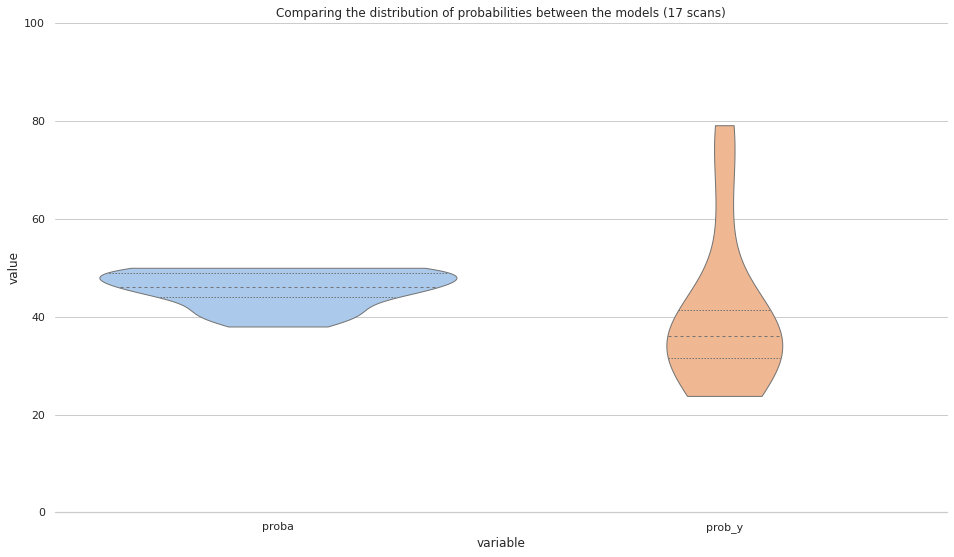

In [166]:
# Studying failure to predict "fail"
sub_df = df_sub_abcd_preds[(df_sub_abcd_preds.pred == 0) & (df_sub_abcd_preds.qc_outcome == "fail")]
print(sub_df.proba.describe())
print(sub_df.prob_y.describe())

plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid", palette="pastel")
sns.violinplot(data=pd.melt(sub_df[["proba", "prob_y"]]), x="variable", y="value",
               split=True, inner="quart", linewidth=1, cut=0)
sns.despine(left=True)
plt.title("Comparing the distribution of probabilities between the models (17 scans)")
plt.ylim(0, 100)

count    243.000000
mean      56.316872
std        6.574620
min       51.000000
25%       52.000000
50%       54.000000
75%       58.000000
max       86.000000
Name: proba, dtype: float64
count    243.000000
mean      34.176423
std       12.189943
min       20.722971
25%       25.137932
50%       30.674289
75%       38.973317
max       79.458234
Name: prob_y, dtype: float64


(0.0, 100.0)

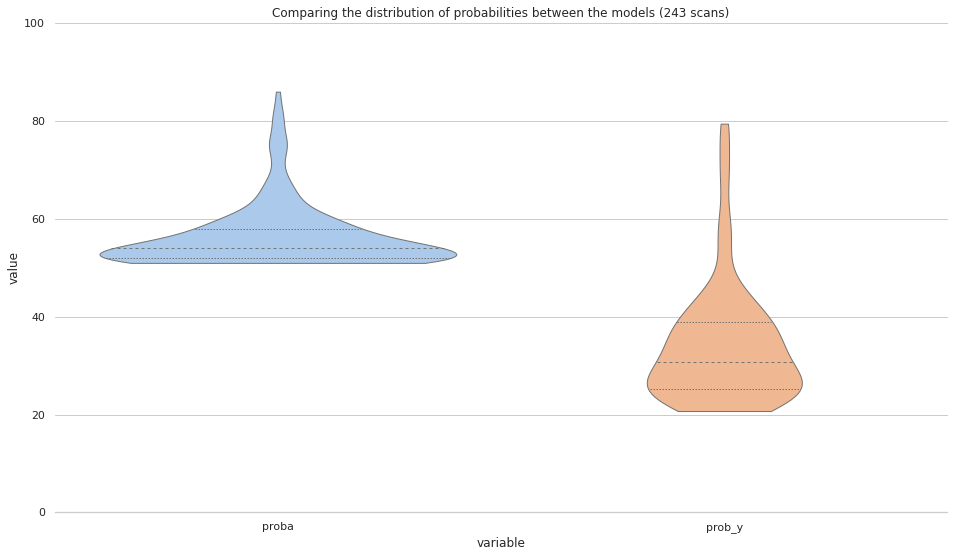

In [167]:
# Studying failure to predict "pass"
sub_df = df_sub_abcd_preds[(df_sub_abcd_preds.pred == 1) & (df_sub_abcd_preds.qc_outcome == "pass")]

print(sub_df.proba.describe())
print(sub_df.prob_y.describe())

plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid", palette="pastel")
sns.violinplot(data=pd.melt(sub_df[["proba", "prob_y"]]), x="variable", y="value",
               split=True, inner="quart", linewidth=1, cut=0)
sns.despine(left=True)
plt.title("Comparing the distribution of probabilities between the models (243 scans)")
plt.ylim(0, 100)

count    50.000000
mean     58.060000
std      15.727799
min      33.000000
25%      47.000000
50%      52.500000
75%      68.250000
max      96.000000
Name: proba, dtype: float64
count    50.000000
mean     38.946469
std      12.623586
min      21.667777
25%      30.882167
50%      35.917803
75%      44.791300
max      74.962902
Name: prob_y, dtype: float64


(0.0, 100.0)

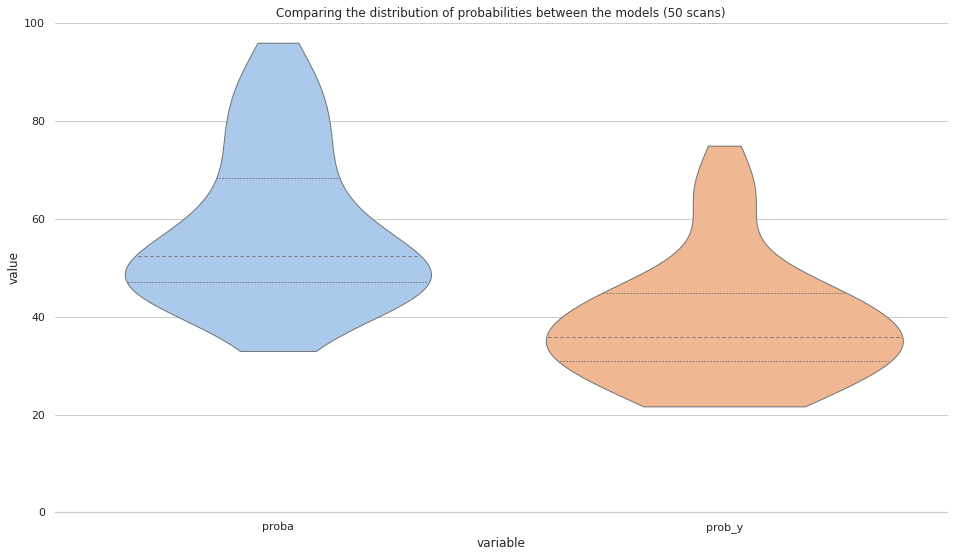

In [168]:
# Studying questionable
sub_df = df_sub_abcd_preds[df_sub_abcd_preds.qc_outcome == "questionable"]

print(sub_df.proba.describe())
print(sub_df.prob_y.describe())

plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid", palette="pastel")
sns.violinplot(data=pd.melt(sub_df[["proba", "prob_y"]]), x="variable", y="value",
               split=True, inner="quart", linewidth=1, cut=0)
sns.despine(left=True)
plt.title("Comparing the distribution of probabilities between the models (50 scans)")
plt.ylim(0, 100)

count    50.000000
mean     84.560000
std      14.459175
min      51.000000
25%      78.750000
50%      90.000000
75%      94.000000
max      99.000000
Name: proba, dtype: float64
count    50.000000
mean     43.507341
std      14.487289
min      25.069470
25%      33.062620
50%      39.121624
75%      53.077251
max      89.169302
Name: prob_y, dtype: float64
Accuracy of MRIQC in predicting fail: 0.26


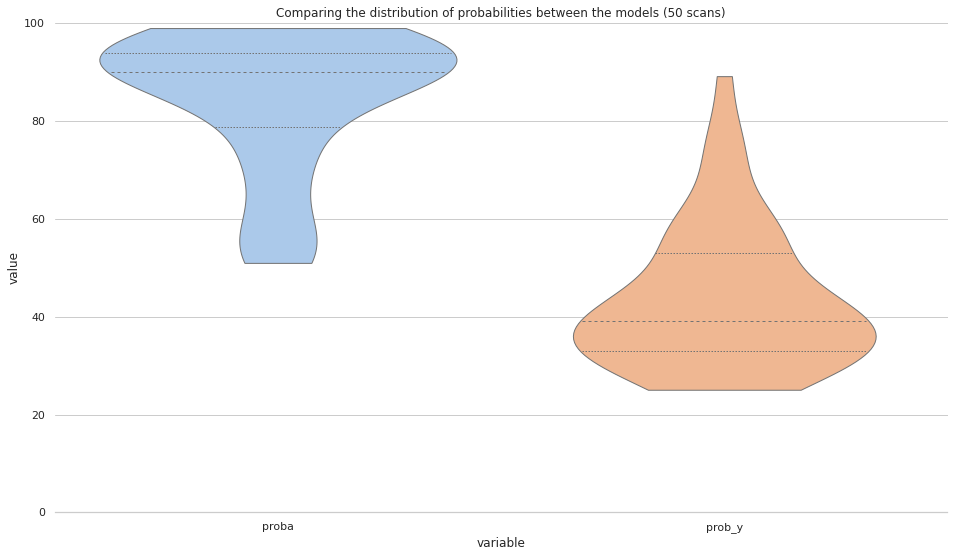

In [169]:
# Studying successful to predict "fail"
sub_df = df_sub_abcd_preds[(df_sub_abcd_preds.pred == 1) & (df_sub_abcd_preds.qc_outcome == "fail")]

print(sub_df.proba.describe())
print(sub_df.prob_y.describe())

plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid", palette="pastel")
sns.violinplot(data=pd.melt(sub_df[["proba", "prob_y"]]), x="variable", y="value",
               split=True, inner="quart", linewidth=1, cut=0)
sns.despine(left=True)
plt.title("Comparing the distribution of probabilities between the models (50 scans)")
plt.ylim(0, 100)

print("Accuracy of MRIQC in predicting fail:", sub_df[sub_df.pred_y == 1].shape[0]/50)

count    50.000000
mean     44.380000
std       3.200064
min      37.000000
25%      42.000000
50%      44.000000
75%      47.000000
max      50.000000
Name: proba, dtype: float64
count    50.000000
mean     34.662454
std      13.371538
min      19.042359
25%      26.990540
50%      30.600335
75%      37.625503
max      76.126762
Name: prob_y, dtype: float64
Accuracy of MRIQC in predicting pass: 0.88


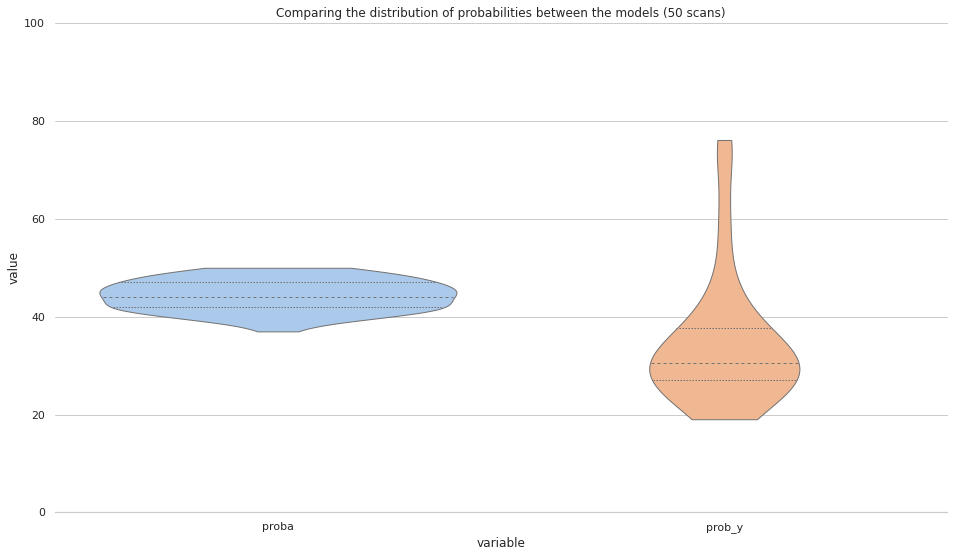

In [170]:
# Studying successful to predict "pass"
sub_df = df_sub_abcd_preds[(df_sub_abcd_preds.pred == 0) & (df_sub_abcd_preds.qc_outcome == "pass")]

print(sub_df.proba.describe())
print(sub_df.prob_y.describe())

plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid", palette="pastel")
sns.violinplot(data=pd.melt(sub_df[["proba", "prob_y"]]), x="variable", y="value",
               split=True, inner="quart", linewidth=1, cut=0)
sns.despine(left=True)
plt.title("Comparing the distribution of probabilities between the models (50 scans)")
plt.ylim(0, 100)

print("Accuracy of MRIQC in predicting pass:", sub_df[sub_df.pred_y == 0].shape[0]/50)

count    410.000000
mean      58.080488
std       14.102345
min       33.000000
25%       51.000000
50%       53.000000
75%       60.000000
max       99.000000
Name: proba, dtype: float64
count    410.000000
mean      36.200592
std       13.198806
min       19.042359
25%       26.578579
50%       33.056982
75%       40.168833
max       89.169302
Name: prob_y, dtype: float64


(0.0, 100.0)

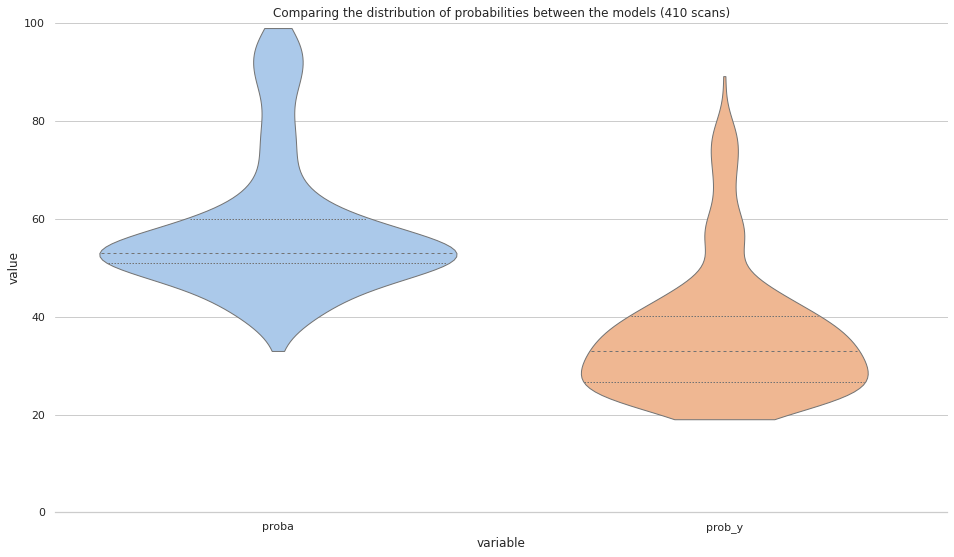

In [171]:
# Global distributions

print(df_sub_abcd_preds.proba.describe())
print(df_sub_abcd_preds.prob_y.describe())

plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid", palette="pastel")
sns.violinplot(data=pd.melt(df_sub_abcd_preds[["proba", "prob_y"]]), x="variable", y="value",
               split=True, inner="quart", linewidth=1, cut=0)
sns.despine(left=True)
plt.title("Comparing the distribution of probabilities between the models (410 scans)")
plt.ylim(0, 100)

# Validation on ADHD200

In [172]:
df_adhd200_pheno = pd.read_csv("pheno_files/adhd200.csv", index_col=0)
df_adhd200_pheno.QC_Anatomical_1.replace(-999.0, 1.0, inplace=True)

In [173]:
df_adhd200_pheno.QC_Anatomical_1.value_counts()

1.0    761
0.0     41
Name: QC_Anatomical_1, dtype: int64

In [174]:
df_adhd200_KKI = pd.read_csv("results/protopnet/ADHD200/KKI/group_results.csv")
df_adhd200_KKI["Site"] = ["KKI"]*df_adhd200_KKI.shape[0]
df_adhd200_NeuroIMAGE = pd.read_csv("results/protopnet/ADHD200/NeuroIMAGE/group_results.csv")
df_adhd200_NeuroIMAGE["Site"] = ["NeuroIMAGE"]*df_adhd200_NeuroIMAGE.shape[0]
df_adhd200_NYU = pd.read_csv("results/protopnet/ADHD200/NYU/group_results.csv")
df_adhd200_NYU["Site"] = ["NYU"]*df_adhd200_NYU.shape[0]
df_adhd200_OHSU = pd.read_csv("results/protopnet/ADHD200/OHSU/group_results.csv")
df_adhd200_OHSU["Site"] = ["OHSU"]*df_adhd200_OHSU.shape[0]
df_adhd200_Peking = pd.read_csv("results/protopnet/ADHD200/Peking/group_results.csv")
df_adhd200_Peking["Site"] = ["Peking"]*df_adhd200_Peking.shape[0]
df_adhd200_Pittsburgh = pd.read_csv("results/protopnet/ADHD200/Pittsburgh/group_results.csv")
df_adhd200_Pittsburgh["Site"] = ["Pittsburg"]*df_adhd200_Pittsburgh.shape[0]
df_adhd200_WashU = pd.read_csv("results/protopnet/ADHD200/WashU/group_results.csv")
df_adhd200_WashU["Site"] = ["WashU"]*df_adhd200_WashU.shape[0]
df_adhd200 = pd.concat([df_adhd200_KKI, df_adhd200_NeuroIMAGE, df_adhd200_NYU, df_adhd200_OHSU,
                       df_adhd200_Peking, df_adhd200_Pittsburgh, df_adhd200_WashU], axis=0)

In [175]:
df_adhd200.head()

,subid,proba,t,pred,slices,axes,x_proba,y_proba,z_proba,x_pred,y_pred,z_pred,Site
0,3611827.0,0.54,39.27,1.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', ...",0.60,0.46,0.56,1.0,0.0,1.0,KKI
1,9922944.0,0.44,34.57,0.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', ...",0.51,0.34,0.46,1.0,0.0,0.0,KKI
2,1652369.0,0.41,34.47,0.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', ...",0.55,0.31,0.38,1.0,0.0,0.0,KKI
3,3154996.0,0.48,35.70,0.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', ...",0.55,0.40,0.49,1.0,0.0,0.0,KKI
4,8337695.0,0.89,34.41,1.0,"[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', ...",0.91,0.93,0.86,1.0,1.0,1.0,KKI


In [176]:
common_subids = list(set(df_adhd200.subid) & set(df_adhd200_pheno["ScanDir ID"]))
len(common_subids)

751

In [177]:
# Data description - Demographics
filenames = ["Brown_TestRelease_phenotypic.csv", "KKI_phenotypic.csv",
            "NeuroIMAGE_phenotypic.csv", "NYU_phenotypic.csv", "OHSU_phenotypic.csv",
            "OHSU_TestRelease_phenotypic.csv", "Peking_1_phenotypic.csv", 
            "Pittsburgh_phenotypic.csv", ]
adhd200_age = []
adhd200_sex = []
adhd200_site = [] 
for filename in filenames:
    df_adhd200_demog = pd.read_csv("pheno_files/ADHD200_pheno_files/" + filename)
    df_adhd200_demog = df_adhd200_demog[[el in common_subids for el in df_adhd200_demog["ScanDir ID"]]]
    adhd200_age = adhd200_age + df_adhd200_demog.Age.tolist()
    adhd200_sex = adhd200_sex + df_adhd200_demog.Gender.tolist()
    adhd200_site = adhd200_site + df_adhd200_demog.Site.tolist()
    
df_adhd200_demog = pd.read_csv("pheno_files/ADHD200_pheno_files/" + "Peking_1_TestRelease_phenotypic.csv")
df_adhd200_demog = df_adhd200_demog[[el in common_subids for el in df_adhd200_demog["ID"]]]
adhd200_age = adhd200_age + df_adhd200_demog.Age.tolist()
adhd200_sex = adhd200_sex + df_adhd200_demog.Gender.tolist()
adhd200_site = adhd200_site + df_adhd200_demog.Site.tolist()
    
df_adhd200_demog = pd.read_csv("pheno_files/ADHD200_pheno_files/" + "WashU_phenotypic.csv")
df_adhd200_demog = df_adhd200_demog[[el in common_subids for el in df_adhd200_demog["ScanDirID"]]]
adhd200_age = adhd200_age + df_adhd200_demog.Age.tolist()
adhd200_sex = adhd200_sex + df_adhd200_demog.Gender.tolist()
adhd200_site = adhd200_site + df_adhd200_demog.Site.tolist()

print("Age:")
print(pd.Series(adhd200_age).describe())

print("Gender:")
print(pd.Series(adhd200_sex).value_counts())

print("Samples:")
print(pd.Series(adhd200_site).value_counts())

Age:
count    751.000000
mean      11.717364
std        3.283292
min        7.090000
25%        9.170000
50%       11.000000
75%       13.570000
max       21.830000
dtype: float64
Gender:
1.0    424
0.0    326
dtype: int64
Samples:
5    222
1    136
6    113
7     89
3     83
8     60
4     48
dtype: int64


In [178]:
df_adhd200 = df_adhd200[[x in common_subids for x in df_adhd200.subid]].reset_index(drop=True)
df_adhd200["qc_1"] = [df_adhd200_pheno[df_adhd200_pheno["ScanDir ID"] == int(x)].QC_Anatomical_1.item() for x in df_adhd200.subid]
i = df_adhd200[df_adhd200.subid == 15016].index
df_adhd200.loc[i, "qc_1"] = 1
df_adhd200 = df_adhd200[~(df_adhd200.subid == 2306976)]

# i = df_adhd200[df_adhd200.subid == 1497055].index
# df_adhd200.loc[i, "qc_1"] = 1

# i = df_adhd200[df_adhd200.subid == 5971050].index
# df_adhd200.loc[i, "qc_1"] = 1

# i = df_adhd200[df_adhd200.subid == 10066].index
# df_adhd200.loc[i, "qc_1"] = 1

# i = df_adhd200[df_adhd200.subid == 10015].index
# df_adhd200.loc[i, "qc_1"] = 1

# i = df_adhd200[df_adhd200.subid == 10043].index
# df_adhd200.loc[i, "qc_1"] = 1

df_adhd200["qc_1"] = df_adhd200["qc_1"].apply(lambda x: -(x-1))

In [179]:
sm.accuracy_score(y_true=df_adhd200["qc_1"].tolist(), y_pred=df_adhd200["pred"].tolist())

0.792

In [180]:
sm.roc_auc_score(y_true=df_adhd200["qc_1"].tolist(), y_score=df_adhd200["proba"].tolist())

0.7585019293880053

In [181]:
df_adhd200["qc_1"].value_counts()

-0.0    711
 1.0     39
Name: qc_1, dtype: int64

In [182]:
df_adhd200.groupby("qc_1").pred.value_counts()

qc_1  pred
-0.0  0.0     570
      1.0     141
 1.0  1.0      24
      0.0      15
Name: pred, dtype: int64

In [183]:
df_adhd200_pheno[[x in df_adhd200[df_adhd200["qc_1"] == 1].subid.astype(int).tolist() for x in df_adhd200_pheno["ScanDir ID"]]]

,ScanDir ID,Site,QC_Anatomical_1,QC_Anatomical_2
65,2768273,3,0.0,NaN
12,1497055,5,0.0,1.0
33,2297413,5,0.0,0.0
57,3441455,5,0.0,0.0
80,5971050,5,0.0,1.0
130,10061,5,0.0,0.0
135,10066,5,0.0,1.0
136,10067,5,0.0,NaN
143,10046,5,0.0,NaN
177,10015,5,0.0,1.0
